<a href="https://github.com/Alighaemmaghami/INSE_6220" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Binary Classification with PyCaret**

Binary classification is a type of supervised machine learning task where the goal is to categorize items into one of two classes or categories.

**Install Pycaret**

In [4]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==3.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.6/172.6 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 107.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.4 M

In [5]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.0.0'

**Import Libraries**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**Dataset**

Among  the certified rice grown in TURKEY,  the  Osmancik species, which has a large planting area since 1997 and the Cammeo species grown since 2014 have been selected for the study.  When  looking  at  the  general  characteristics  of  Osmancik species, they have a wide, long, glassy and dull appearance.  When looking at the general characteristics of the Cammeo species, they have wide and long, glassy and dull in appearance.  A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.


All of these parameters are real-valued continuous.

https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik

In [7]:
!pip3 install -U ucimlrepo

In [8]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)


In [9]:

# data (as pandas dataframes)
df = rice_cammeo_and_osmancik.data
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets


In [8]:

# metadata
print(rice_cammeo_and_osmancik.metadata.keys())



dict_keys(['uci_id', 'name', 'repository_url', 'data_url', 'abstract', 'area', 'tasks', 'characteristics', 'num_instances', 'num_features', 'feature_types', 'demographics', 'target_col', 'index_col', 'has_missing_values', 'missing_values_symbol', 'year_of_dataset_creation', 'last_updated', 'dataset_doi', 'creators', 'intro_paper', 'additional_info'])


In [9]:
# variable information
print(rice_cammeo_and_osmancik.variables.description)

0    Returns the number of pixels within the bounda...
1    Calculates the circumference by calculating th...
2    The longest line that can be drawn on the rice...
3    The shortest line that can be drawn on the ric...
4    It measures how round the ellipse, which has t...
5    Returns the pixel count of the smallest convex...
6    Returns the ratio of the region formed by the ...
7                                  Cammeo and Osmancik
Name: description, dtype: object


In [10]:
X

Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231  525.578979         229.749878          85.093788      0.928882   
1     14656  494.311005         206.020065          91.730972      0.895405   
2     14634  501.122009         214.106781          87.768288      0.912118   
3     13176  458.342987         193.337387          87.448395      0.891861   
4     14688  507.166992         211.743378          89.312454      0.906691   
...     ...         ...                ...                ...           ...   
3805  11441  415.858002         170.486771          85.756592      0.864280   
3806  11625  421.390015         167.714798          89.462570      0.845850   
3807  12437  442.498993         183.572922          86.801979      0.881144   
3808   9882  392.296997         161.193985          78.210480      0.874406   
3809  11434  404.709992         161.079269          90.868195      0.825692   

      Convex_Area    Extent  
0           15617  0.572896  
1           15072  0.615436  
2           14954  0.693259  
3           13368  0.640669  
4           15262  0.646024  
...           ...       ...  
3805        11628  0.681012  
3806        11904  0.694279  
3807        12645  0.626739  
3808        10097  0.659064  
3809        11591  0.802949  

[3810 rows x 7 columns]

In [11]:
type(X)

pandas.core.frame.DataFrame

In [10]:
#read csv file into dataframe
df = df["original"]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


In [14]:
df.describe()

Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count   3810.000000  3810.000000        3810.000000        3810.000000   
mean   12667.727559   454.239180         188.776222          86.313750   
std     1732.367706    35.597081          17.448679           5.729817   
min     7551.000000   359.100006         145.264465          59.532406   
25%    11370.500000   426.144752         174.353855          82.731695   
50%    12421.500000   448.852493         185.810059          86.434647   
75%    13950.000000   483.683746         203.550438          90.143677   
max    18913.000000   548.445984         239.010498         107.542450   

       Eccentricity   Convex_Area       Extent  
count   3810.000000   3810.000000  3810.000000  
mean       0.886871  12952.496850     0.661934  
std        0.020818   1776.972042     0.077239  
min        0.777233   7723.000000     0.497413  
25%        0.872402  11626.250000     0.598862  
50%        0.889050  12706.500000     0.645361  
75%        0.902588  14284.000000     0.726562  
max        0.948007  19099.000000     0.861050

In [15]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [16]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

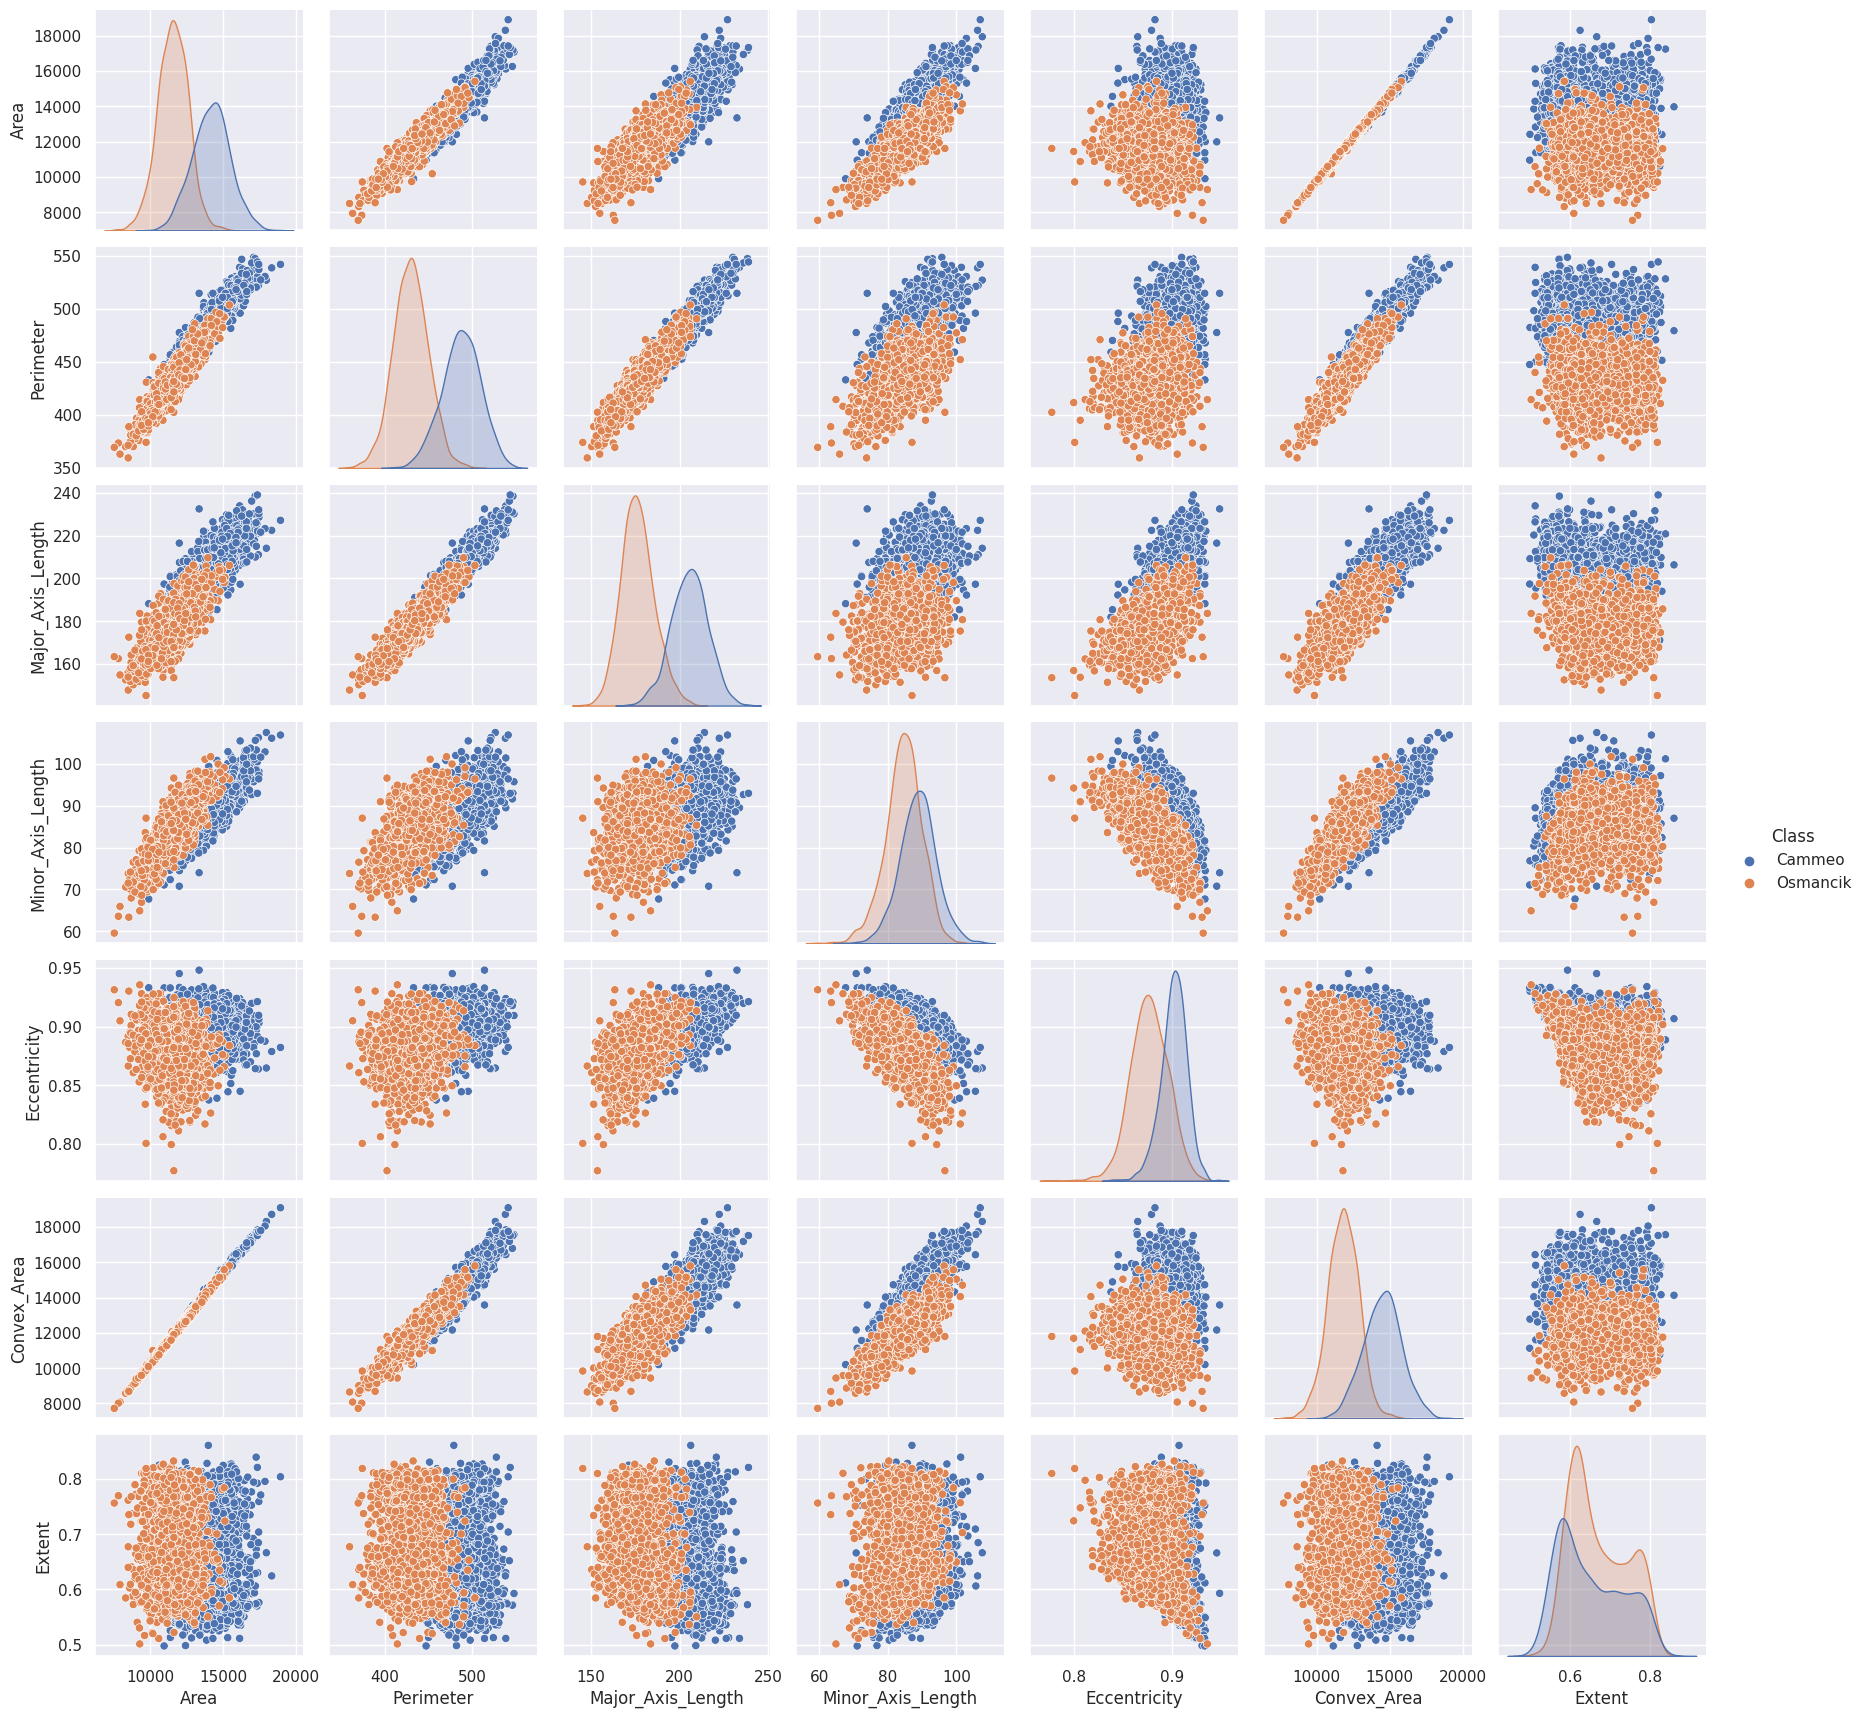

In [19]:
sns.pairplot(df,hue="Class")
plt.show()

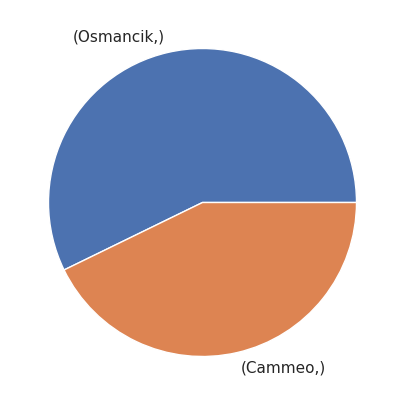

In [20]:
#y=df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()


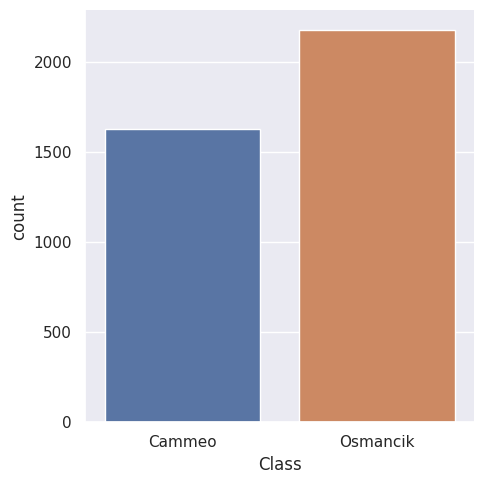

In [21]:
sns.catplot(data=df, x='Class', kind='count');

**Data Matrix**

In [17]:
X.head(10)

Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231  525.578979         229.749878          85.093788      0.928882   
1  14656  494.311005         206.020065          91.730972      0.895405   
2  14634  501.122009         214.106781          87.768288      0.912118   
3  13176  458.342987         193.337387          87.448395      0.891861   
4  14688  507.166992         211.743378          89.312454      0.906691   
5  13479  477.015991         200.053055          86.650291      0.901328   
6  15757  509.281006         207.296677          98.336136      0.880323   
7  16405  526.570007         221.612518          95.436707      0.902521   
8  14534  483.640991         196.650818          95.050682      0.875429   
9  13485  471.570007         198.272644          87.727287      0.896789   

   Convex_Area    Extent  
0        15617  0.572896  
1        15072  0.615436  
2        14954  0.693259  
3        13368  0.640669  
4        15262  0.646024  
5        13786  0.657897  
6        16150  0.589708  
7        16837  0.658888  
8        14932  0.649651  
9        13734  0.572320

In [18]:
X.describe().transpose()

count          mean          std          min  \
Area               3810.0  12667.727559  1732.367706  7551.000000   
Perimeter          3810.0    454.239180    35.597081   359.100006   
Major_Axis_Length  3810.0    188.776222    17.448679   145.264465   
Minor_Axis_Length  3810.0     86.313750     5.729817    59.532406   
Eccentricity       3810.0      0.886871     0.020818     0.777233   
Convex_Area        3810.0  12952.496850  1776.972042  7723.000000   
Extent             3810.0      0.661934     0.077239     0.497413   

                            25%           50%           75%           max  
Area               11370.500000  12421.500000  13950.000000  18913.000000  
Perimeter            426.144752    448.852493    483.683746    548.445984  
Major_Axis_Length    174.353855    185.810059    203.550438    239.010498  
Minor_Axis_Length     82.731695     86.434647     90.143677    107.542450  
Eccentricity           0.872402      0.889050      0.902588      0.948007  
Convex_Area        11626.250000  12706.500000  14284.000000  19099.000000  
Extent                 0.598862      0.645361      0.726562      0.861050

**Standardize the Data**

In [11]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  1.479830   2.004354           2.348547          -0.212943      2.018337   
1  1.147870   1.125853           0.988390           0.945568      0.410018   
2  1.135169   1.317214           1.451908           0.253887      1.212956   
3  0.293436   0.115300           0.261439           0.198051      0.239751   
4  1.166345   1.487053           1.316442           0.523419      0.952221   
5  0.468364   0.639935           0.646371           0.058743      0.694590   
6  1.783500   1.546448           1.061564           2.098490     -0.314536   
7  2.157604   2.032198           1.882126           1.592399      0.751870   
8  1.077437   0.826070           0.451360           1.525019     -0.549700   
9  0.471828   0.486925           0.544320           0.246731      0.476524   

   Convex_Area    Extent  
0     1.499659 -1.152921  
1     1.192918 -0.602079  
2     1.126504  0.405611  
3     0.233857 -0.275351  
4     1.299855 -0.206013  
5     0.469120 -0.052270  
6     1.799647 -0.935222  
7     2.186311 -0.039438  
8     1.114122 -0.159043  
9     0.439853 -1.160375

In [20]:
X.describe().transpose()

count          mean       std       min       25%  \
Area               3810.0  0.000000e+00  1.000131 -2.953991 -0.748916   
Perimeter          3810.0  4.774250e-16  1.000131 -2.673019 -0.789338   
Major_Axis_Length  3810.0  2.327447e-15  1.000131 -2.494027 -0.826668   
Minor_Axis_Length  3810.0 -2.387125e-16  1.000131 -4.674645 -0.625243   
Eccentricity       3810.0 -2.088735e-15  1.000131 -5.267280 -0.695126   
Convex_Area        3810.0 -4.774250e-16  1.000131 -2.943312 -0.746450   
Extent             3810.0 -1.186103e-15  1.000131 -2.130313 -0.816689   

                        50%       75%       max  
Area              -0.142152  0.740282  3.605523  
Perimeter         -0.151344  0.827271  2.646823  
Major_Axis_Length -0.170016  0.846835  2.879351  
Minor_Axis_Length  0.021102  0.668508  3.705439  
Eccentricity       0.104713  0.755107  2.937147  
Convex_Area       -0.138454  0.749408  3.459430  
Extent            -0.214592  0.836834  2.578260

**Observations and variables**

In [21]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

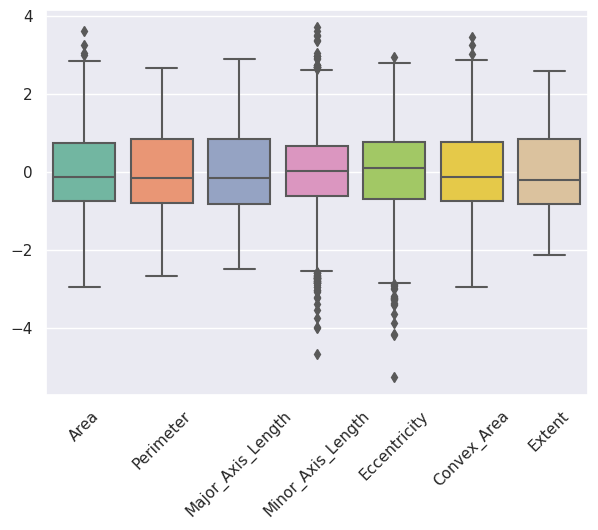

In [27]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

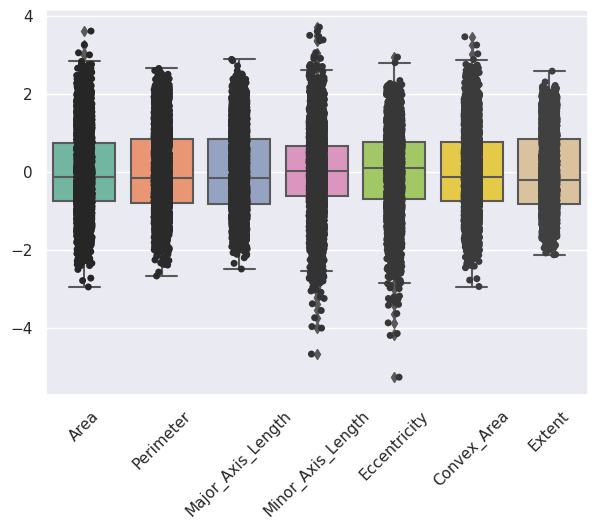

In [28]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

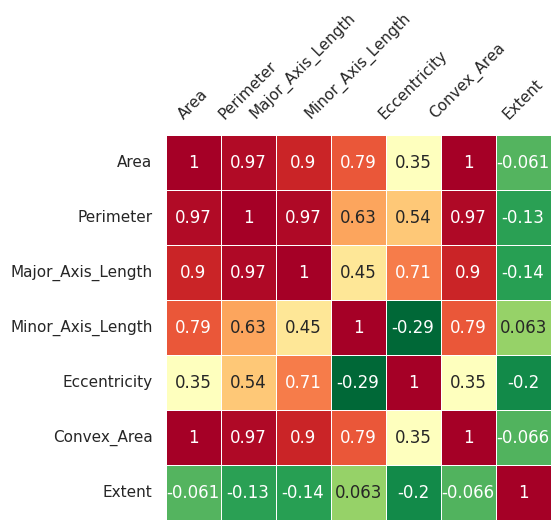

In [29]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

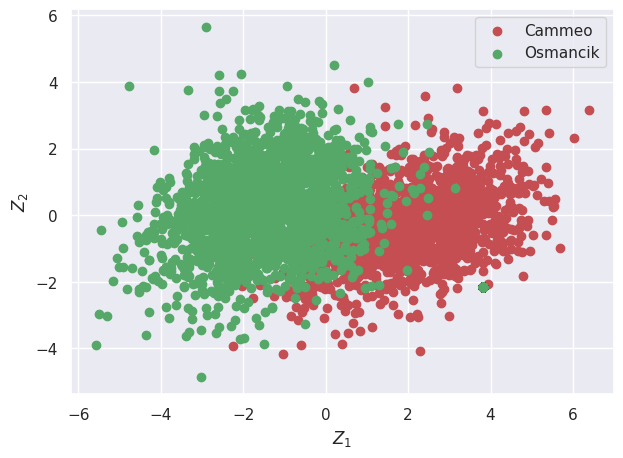

In [24]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Cammeo)->0,  2(Osmancik)->1,
idx_Cammeo = np.where(y == "Cammeo")
idx_Osmancik = np.where(y == "Osmancik")

plt. figure()
plt.scatter(Z[idx_Cammeo,0], Z[idx_Cammeo,1], c='r', label='Cammeo')
plt.scatter(Z[idx_Osmancik,0], Z[idx_Osmancik,1], c='g', label='Osmancik')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

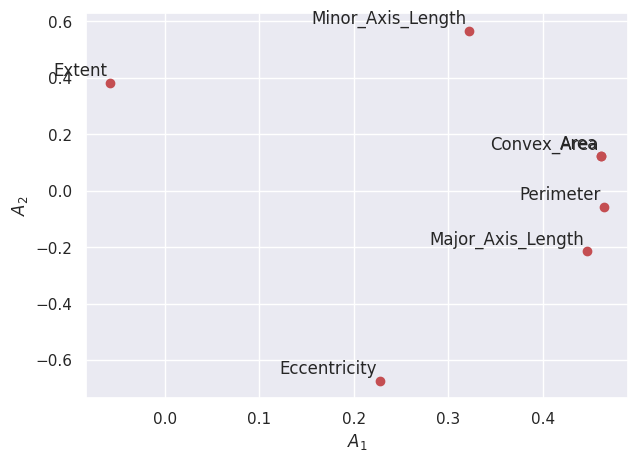

In [25]:
A = pca.components_.T
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

In [39]:
print("Eigen vectors: ",A)

Eigen vectors:  [[ 0.46125179  0.12437713 -0.01261109 -0.33469497  0.37202436  0.19428799
   0.69530382]
 [ 0.46440793 -0.05575087  0.02837202  0.68885689 -0.47535595  0.12575766
   0.25319963]
 [ 0.44707633 -0.21345616  0.1215549   0.2405474   0.52572729 -0.58169723
  -0.25915192]
 [ 0.321752    0.56710548 -0.21271588 -0.32792777 -0.42723064 -0.47572402
  -0.11507822]
 [ 0.22732878 -0.67315219  0.29798463 -0.48220471 -0.40928605 -0.07804218
  -0.01630597]
 [ 0.46169356  0.12253499 -0.01687902 -0.12294785  0.09489032  0.61290856
  -0.60972296]
 [-0.05771599  0.38223203  0.9219179   0.02045092 -0.01414705  0.00216608
   0.00344323]]


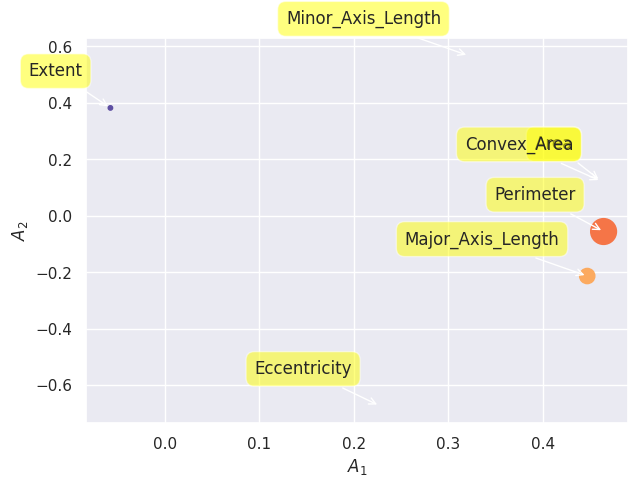

In [34]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))

plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

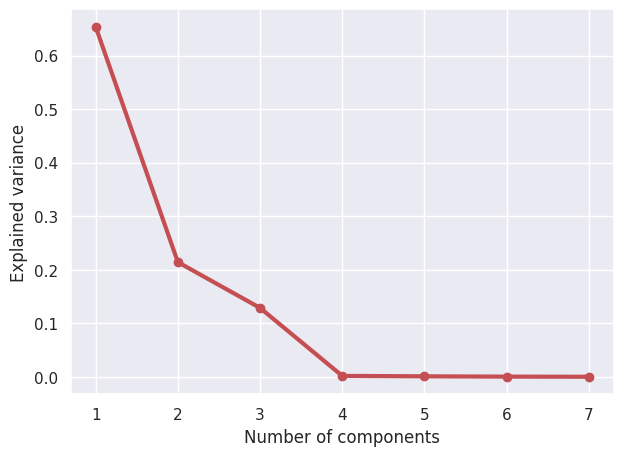

In [28]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

In [29]:
print("Eigenvalues: ",Lambda)

Eigenvalues:  [4.58018140e+00 1.50015241e+00 9.01041900e-01 1.17588976e-02
 6.21828711e-03 2.05320303e-03 4.31650877e-04]


Text(0, 0.5, 'Cumulative explained variance')

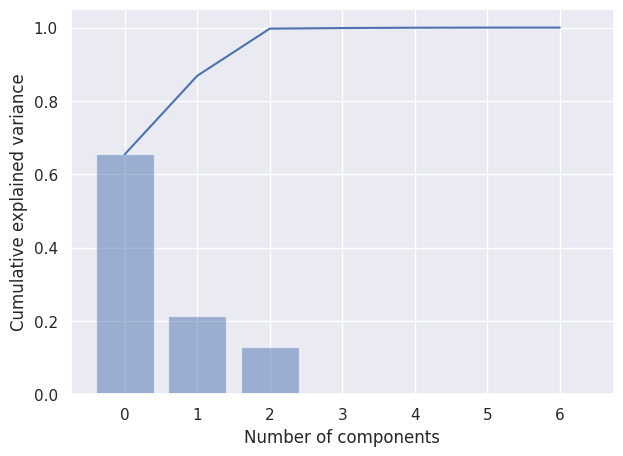

In [32]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [33]:
print("explained variances ",ell)

explained variances  [6.54139894e-01 2.14251238e-01 1.28686487e-01 1.67940162e-03
 8.88093573e-04 2.93237734e-04 6.16482261e-05]


In [34]:
for item in ell:
  print("explained variance: ",item)

explained variance:  0.6541398939268325
explained variance:  0.21425123839699844
explained variance:  0.12868648652818565
explained variance:  0.0016794016151683324
explained variance:  0.0008880935730697731
explained variance:  0.00029323773362419813
explained variance:  6.16482261211336e-05


In [30]:
for item in Lambda:
  print("Eigenvalue: ",item)

Eigenvalue:  4.580181404838178
Eigenvalue:  1.5001524095689018
Eigenvalue:  0.9010418996342111
Eigenvalue:  0.01175889763101586
Eigenvalue:  0.006218287107842175
Eigenvalue:  0.0020532030338034557
Eigenvalue:  0.0004316508770413842


**Biplot**

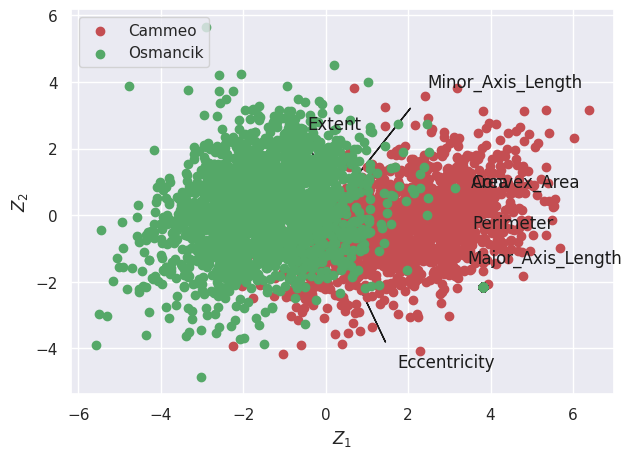

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Cammeo,0], Z[idx_Cammeo,1], c='r', label='Cammeo')
plt.scatter(Z[idx_Osmancik,0], Z[idx_Osmancik,1], c='g', label='Osmancik')
plt.legend(loc='upper left')

##**Using PCA Library**

In [35]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.7 MB/s eta 0:00:00


In [36]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [37]:
out['PC']

PC1       PC2       PC3
0     3.812628 -2.165331 -0.117799
1     2.477158  0.045296 -0.516550
2     2.638556 -0.621615  0.861905
3     0.547865 -0.151403 -0.197135
4     2.814031 -0.482463  0.148042
...        ...       ...       ...
3805 -1.932582  0.874291 -0.211478
3806 -1.813787  1.960336 -0.473423
3807 -0.436684  0.103594 -0.561260
3808 -3.587933 -0.375702 -0.105979
3809 -2.556088  3.361237  0.427906

[3810 rows x 3 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.87%] of the variance'}, xlabel='PC1 (65.4% expl.var)', ylabel='PC2 (21.4% expl.var)'>)

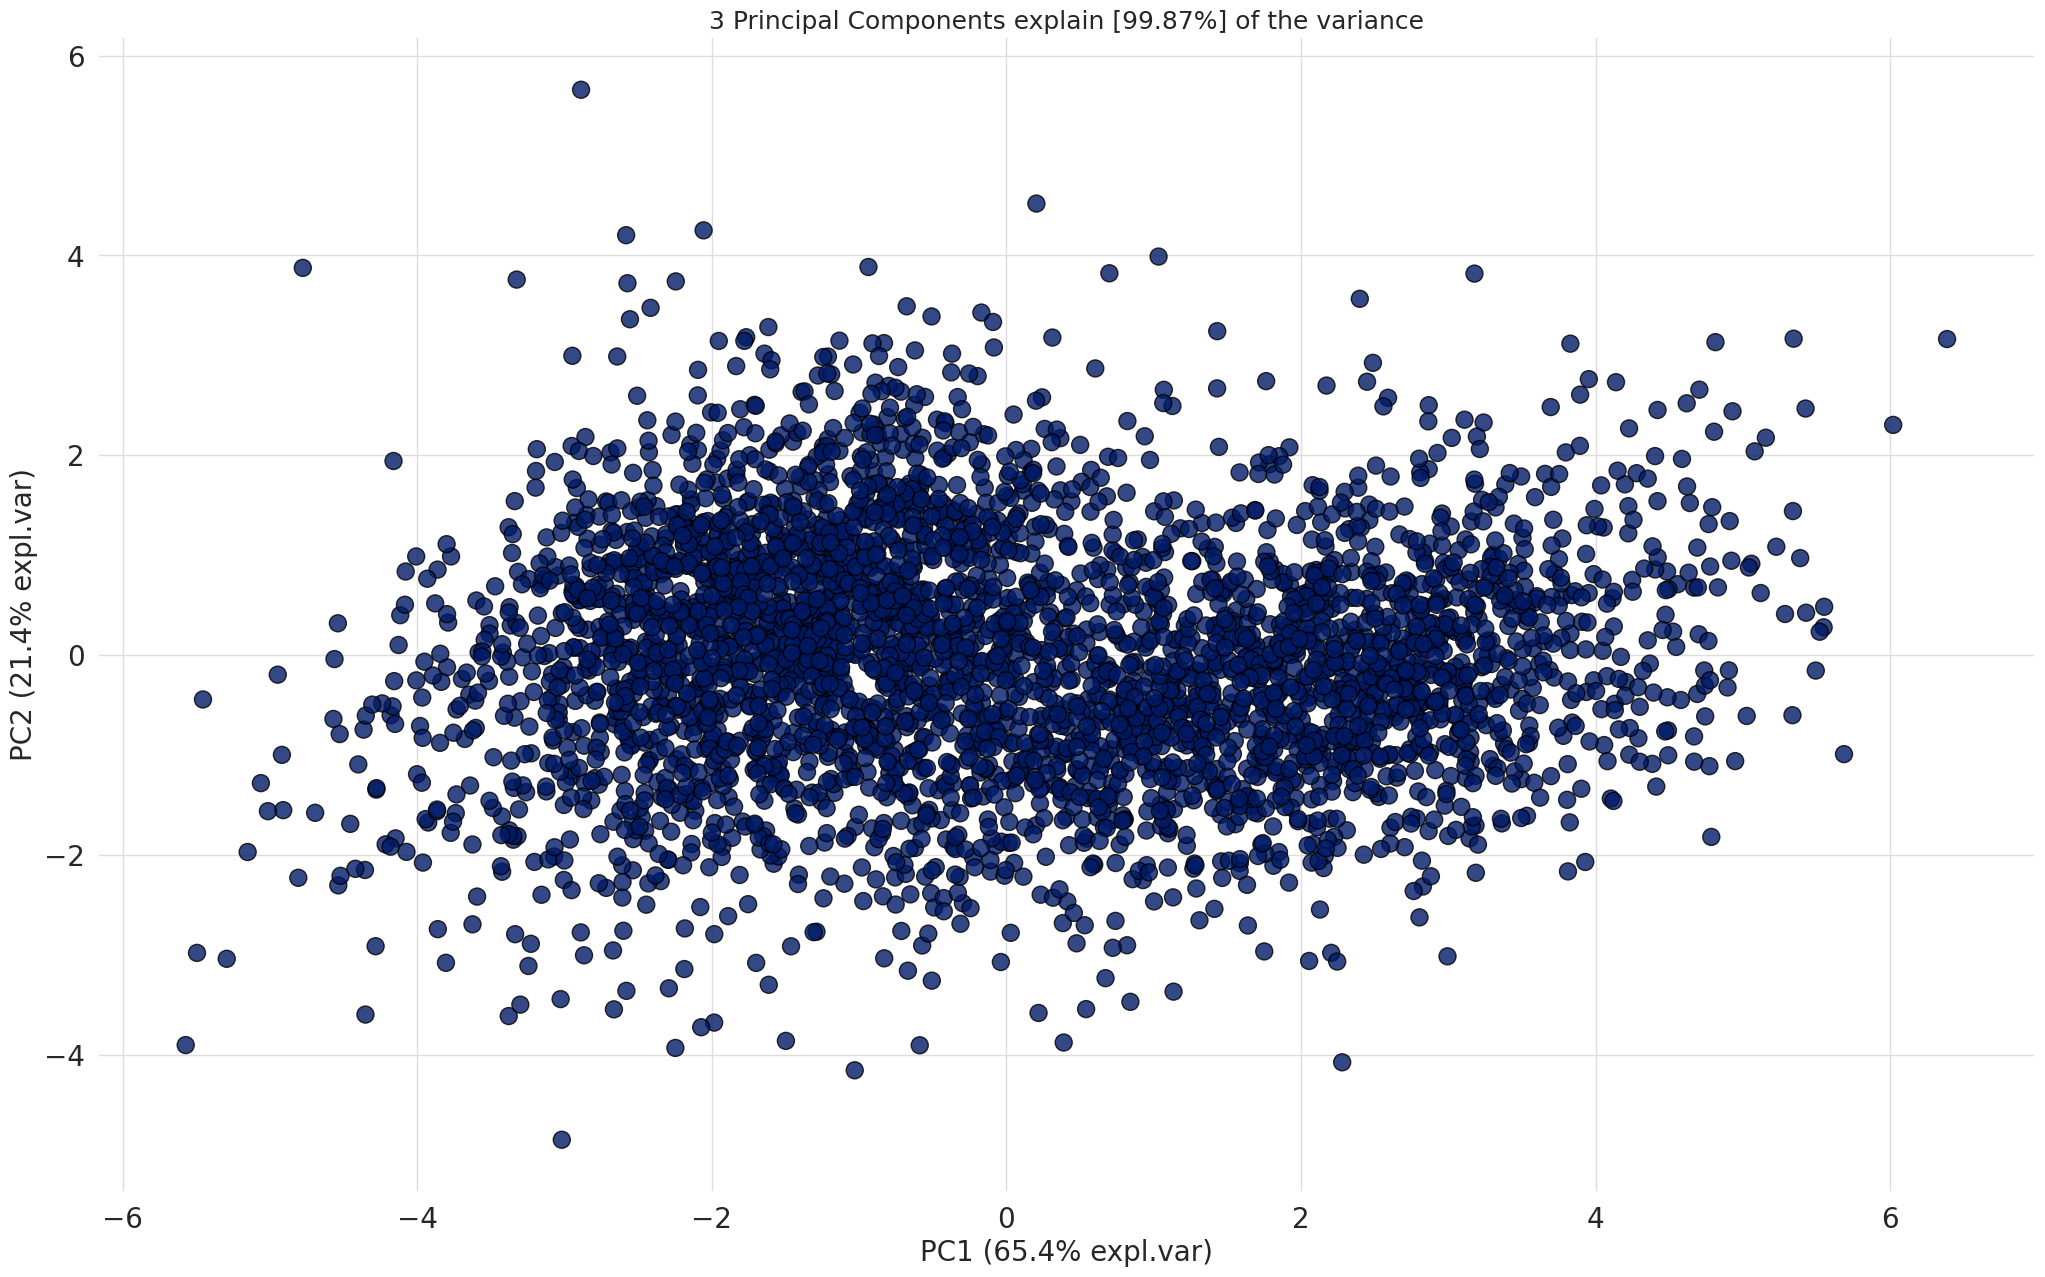

In [38]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [40]:
A = out['loadings'].T

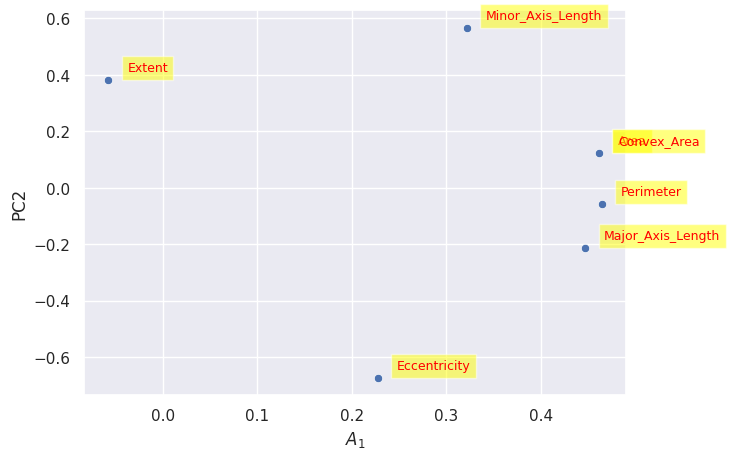

In [41]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
#plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.03,
          s=variables[i],
          fontdict=dict(color='red',size=9),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

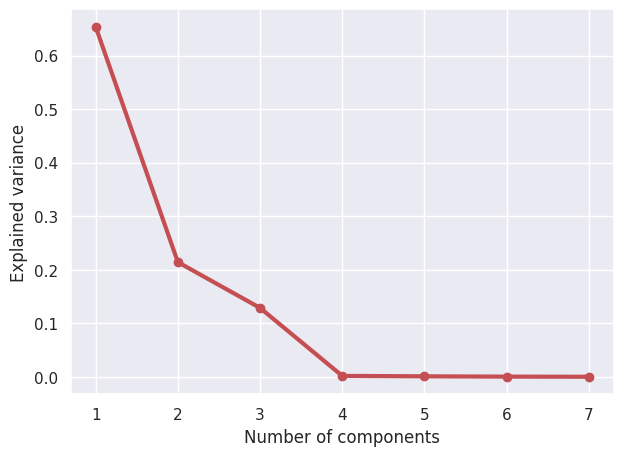

In [42]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

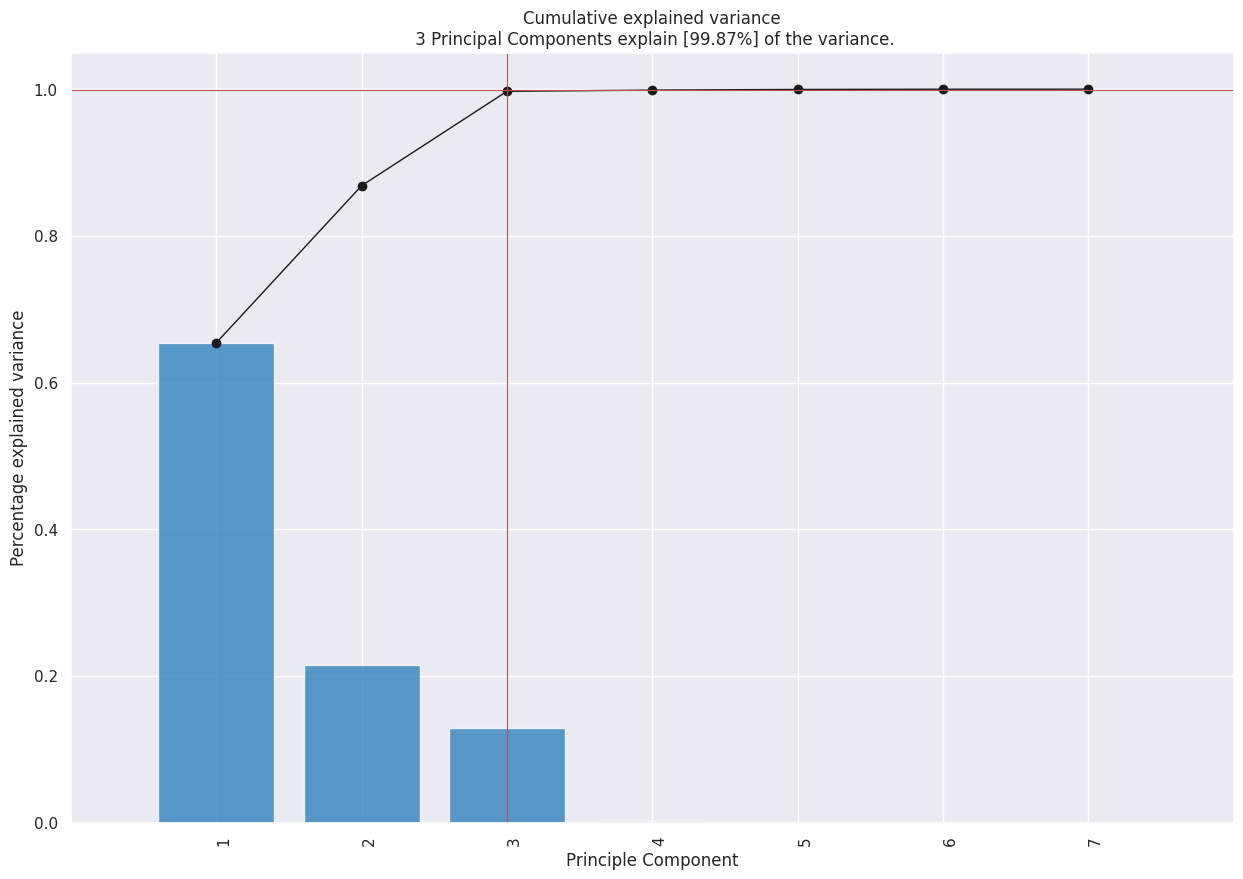

In [43]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.87%] of the variance'}, xlabel='PC1 (65.4% expl.var)', ylabel='PC2 (21.4% expl.var)'>)

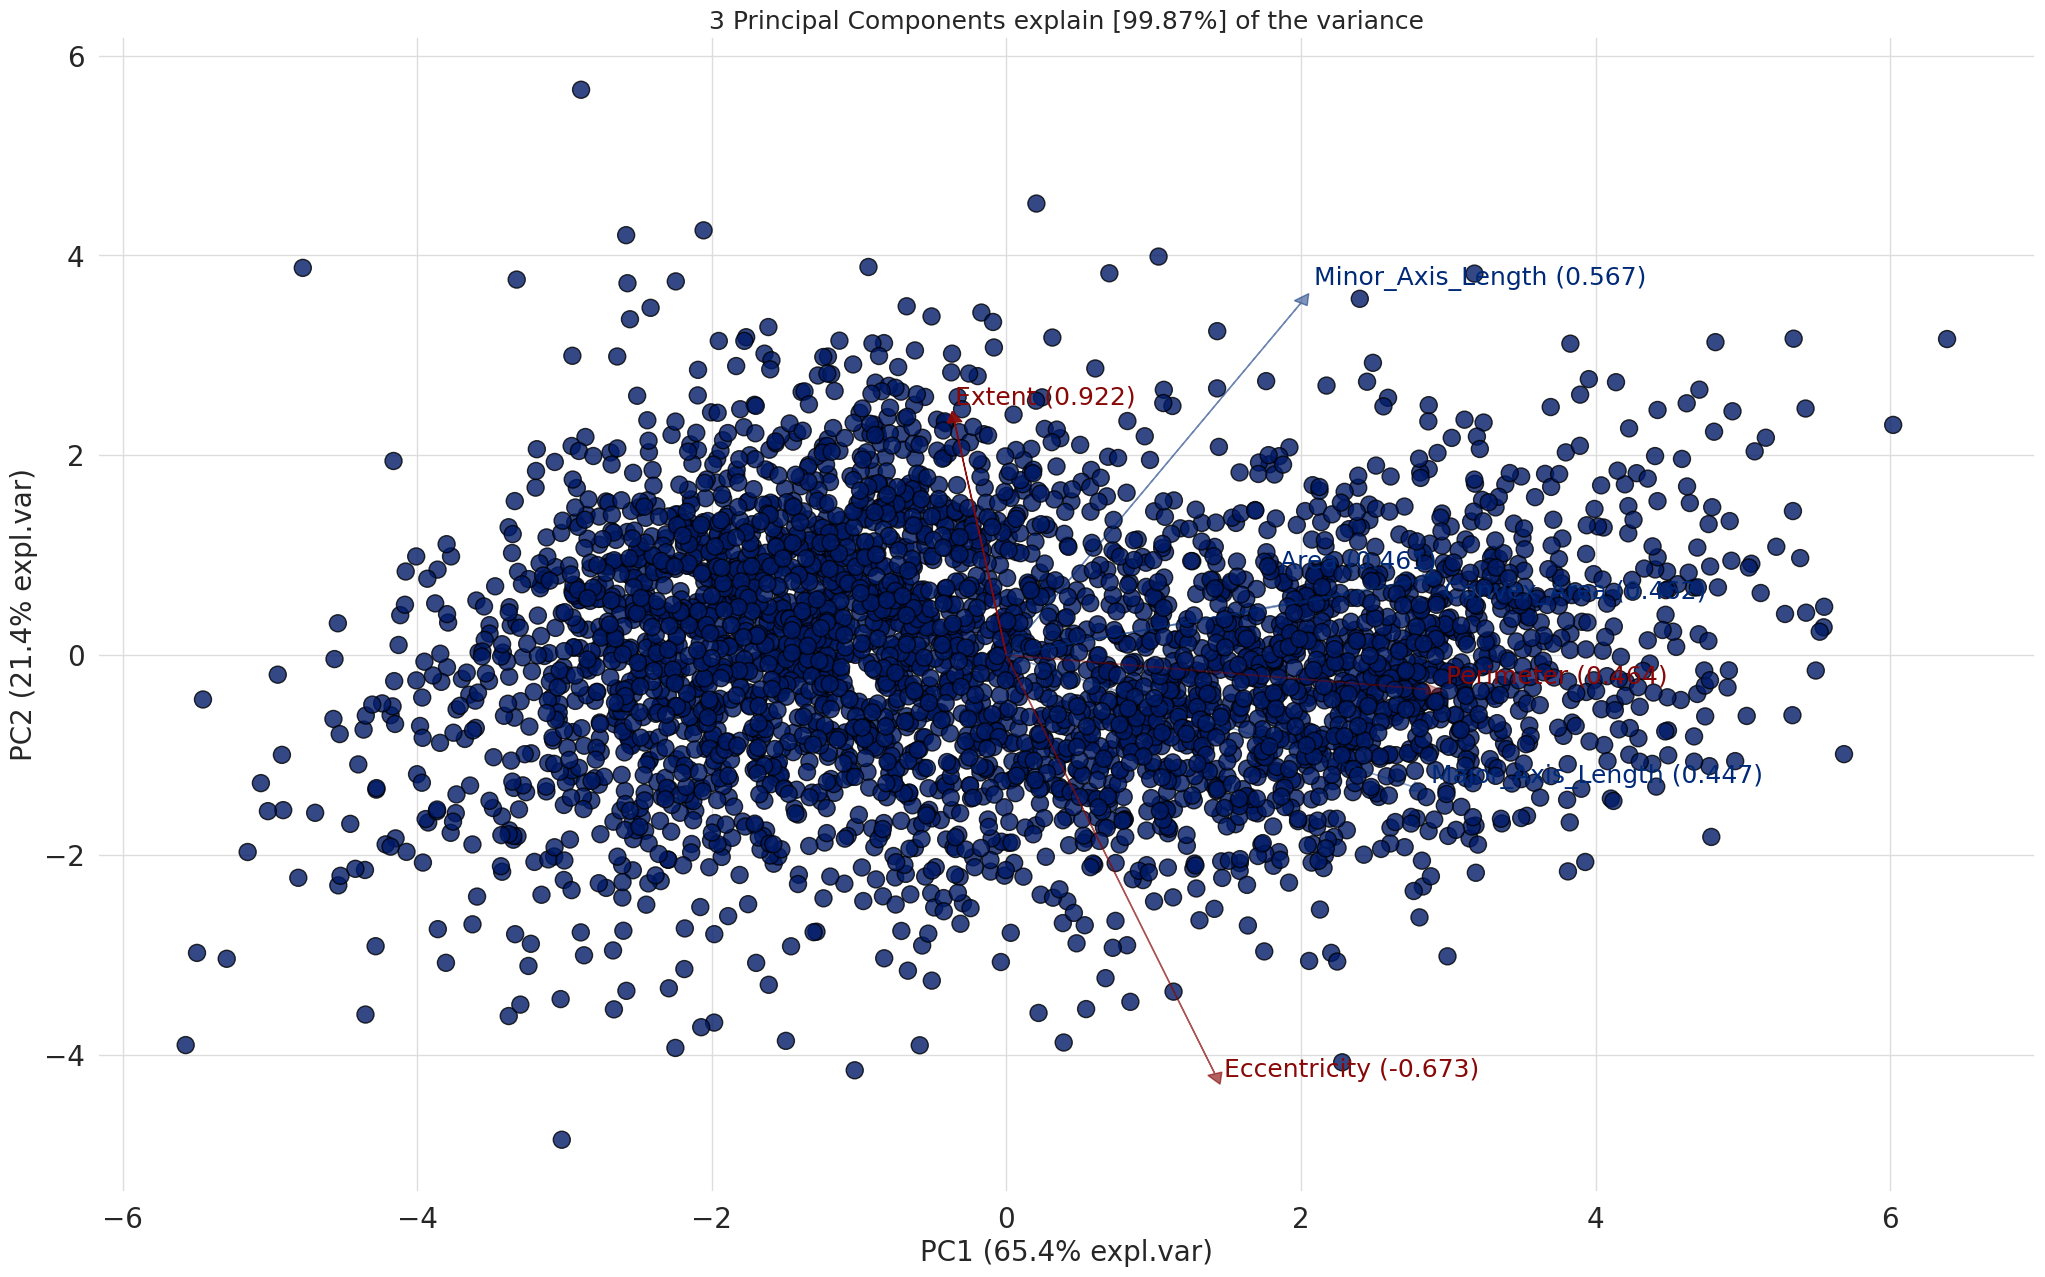

In [44]:
model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '3 Principal Components explain [99.87%] of the variance'}, xlabel='PC1 (65.4% expl.var)', ylabel='PC2 (21.4% expl.var)', zlabel='PC3 (12.8% expl.var)'>)

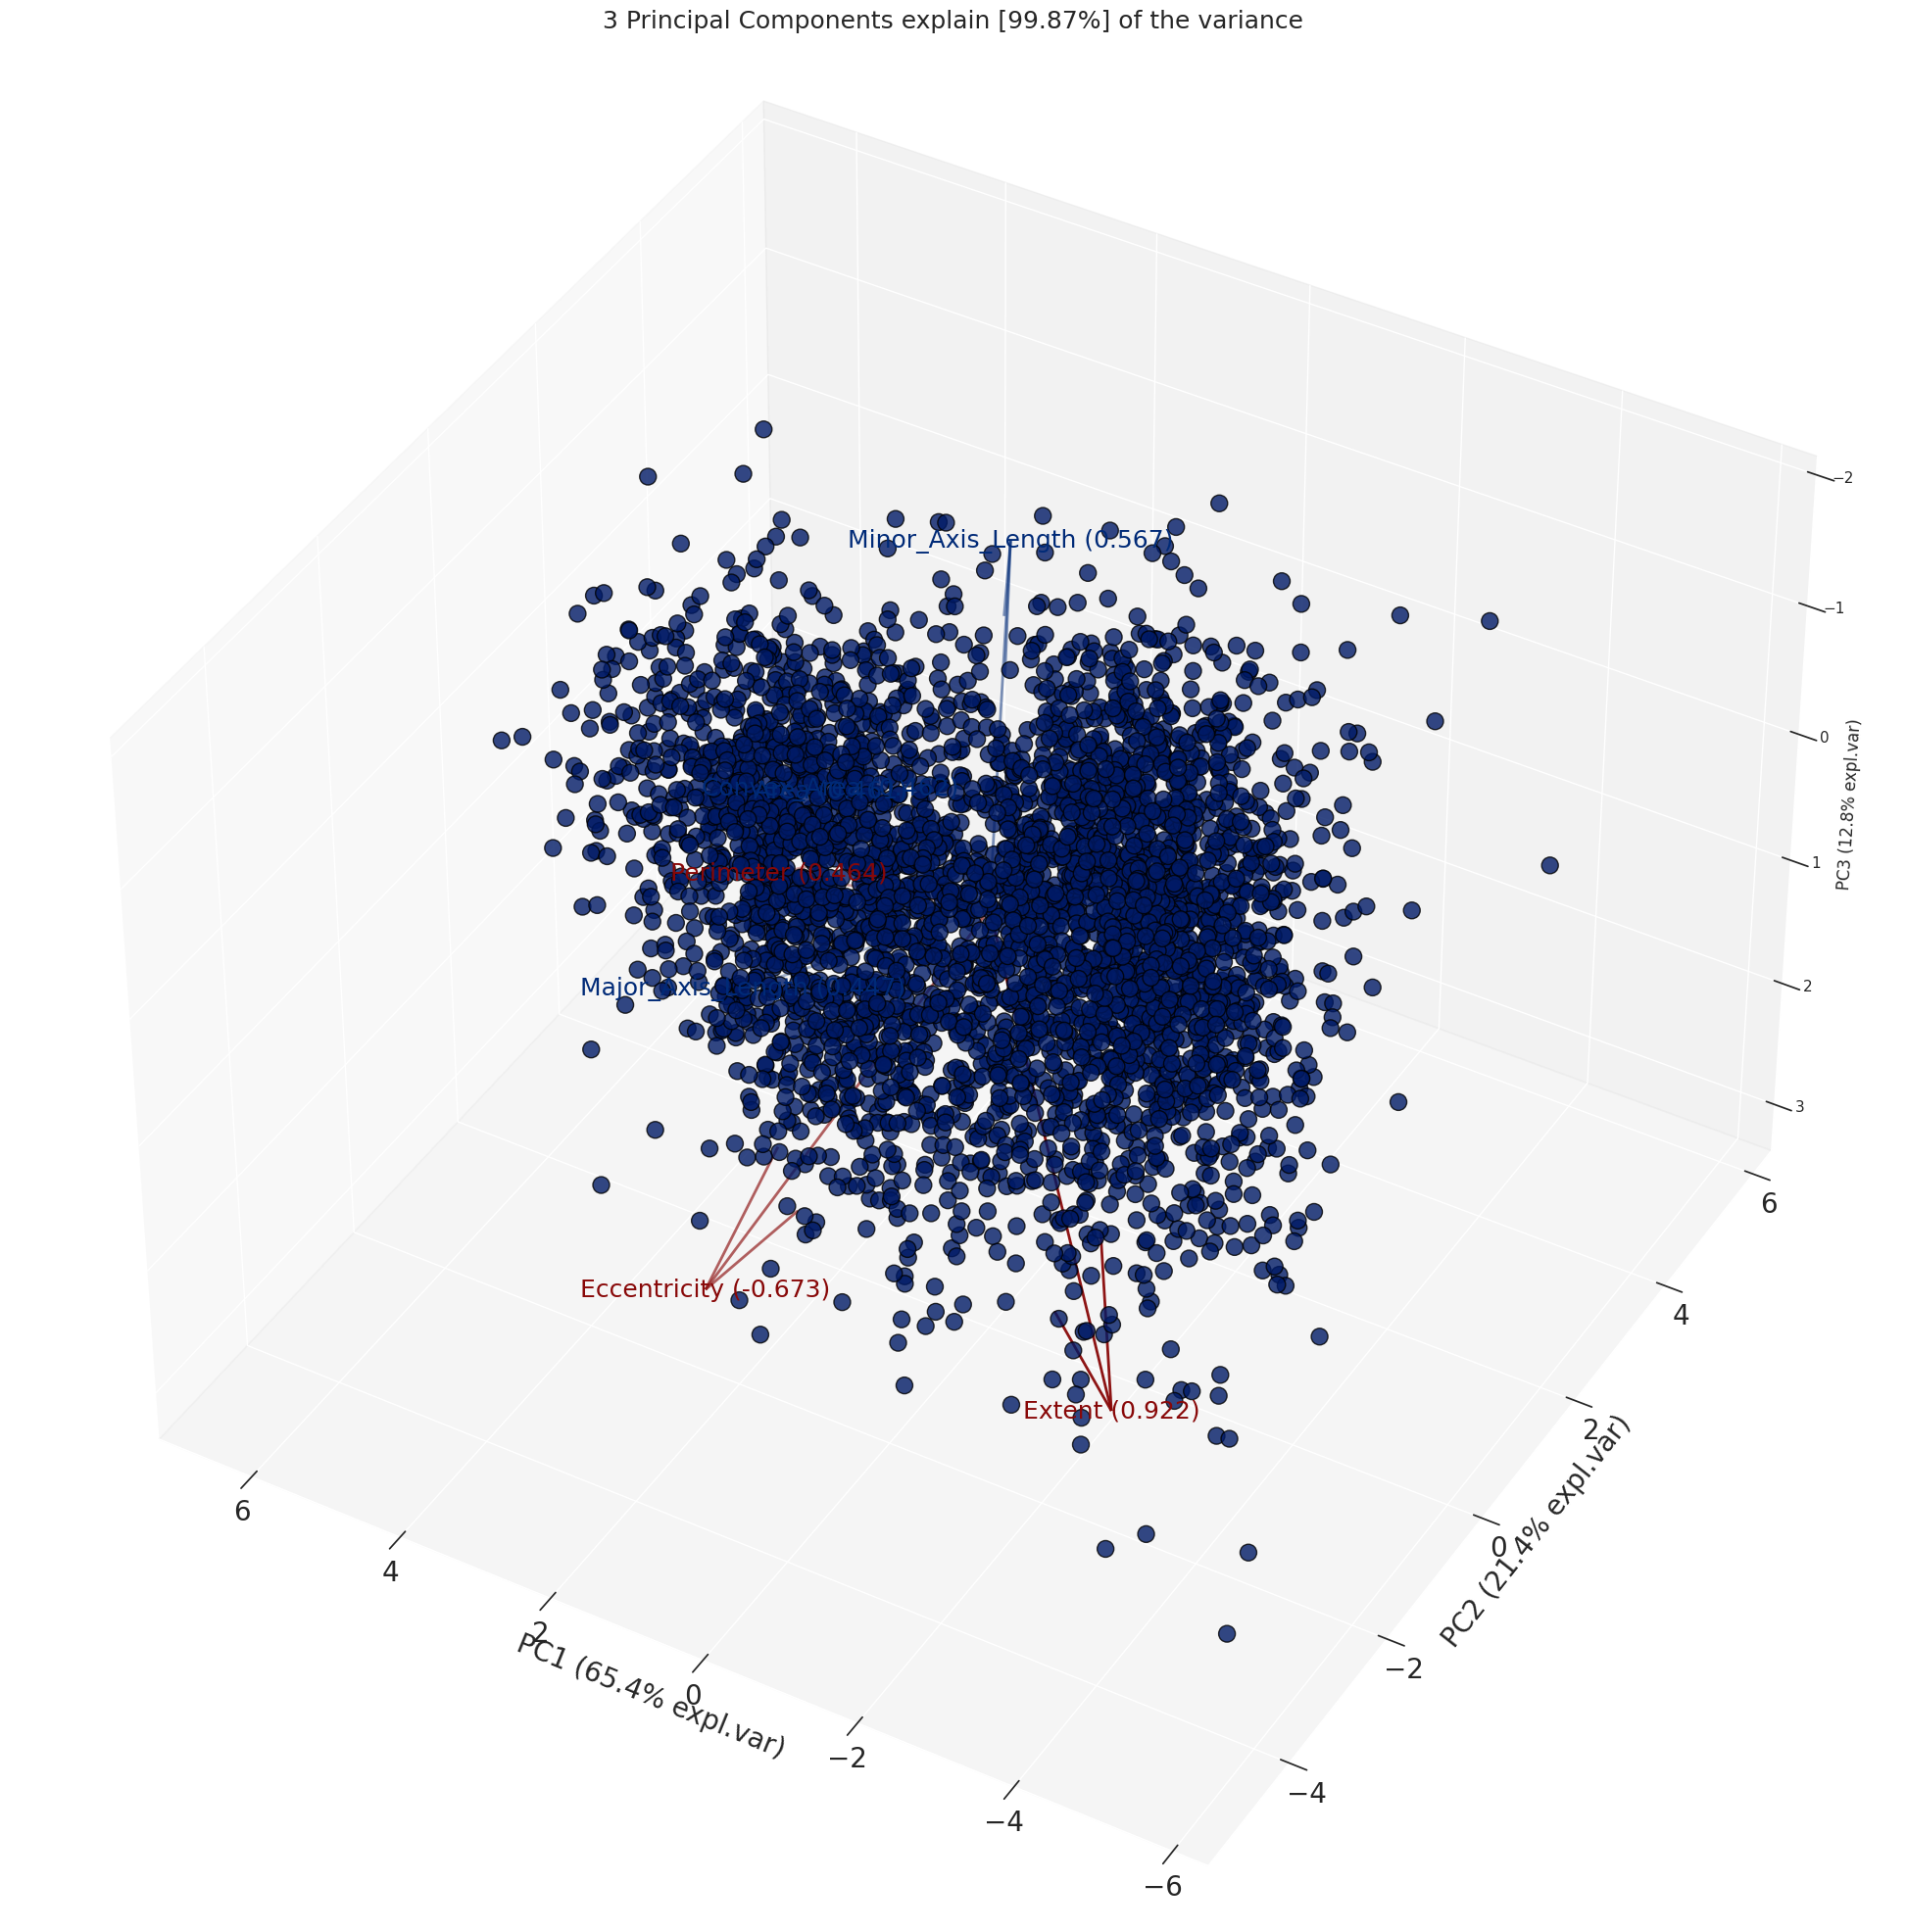

In [45]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

To showcase the predict_model() function on new data, 381 observations have been reserved from the initial dataset for making predictions. It's important to note that this isn't a conventional train/test split; rather, it mimics a real-life scenario. Essentially, these 381 records were not accessible during the execution of the machine learning experiment.



In [12]:
data = df.sample(frac=0.9, random_state=0)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3429, 8)
Unseen Data For Predictions: (381, 8)


**Setting up the Environment in PyCaret**

The setup() function initializes the pycaret environment and establishes the transformation pipeline to prepare data for modeling and deployment. It is a prerequisite for any other function in pycaret and requires two essential parameters: a pandas dataframe and the name of the target column. Additional parameters, which will be covered in later tutorials, are optional and used to customize the pre-processing pipeline.

Upon execution of setup(), PyCaret's inference algorithm automatically deduces the data types for all features based on certain properties. While the inference is generally accurate, discrepancies may arise. To address this, PyCaret presents a table showing the features and their inferred data types after setup(). If the data types are correctly identified, pressing enter allows the process to continue, or typing 'quit' ends the experiment. Ensuring accurate data types is crucial in PyCaret, as it automatically performs essential pre-processing tasks tailored to each data type, a key aspect of any machine learning experiment.

In [13]:
from pycaret.classification import *


In [14]:
clf = setup(data=data, target='Class', train_size=0.7,session_id=123)

After the successful execution of setup(), an information grid is printed, containing crucial details, particularly related to the pre-processing pipeline established during the setup() process. While many features in this grid are beyond the scope of this tutorial, it's essential to highlight a few key points at this stage:

* **session_id** : A pseudo-random number acting as a seed for later reproducibility in all functions. If no session_id is specified, a random number is automatically generated and distributed to all functions. Here, the session_id is set as 123 for future reproducibility.

* **Target Type** : Identifies whether the target variable is Binary or Multiclass, automatically detected and displayed. The experiment's functionality remains identical for both types of problems.

* **Label Encoded** : When the Target variable is in string format (e.g., 'Yes' or 'No'), it automatically encodes the labels into 1 and 0, showing the mapping (0: No, 1: Yes) for reference.

* **Original Data** : Presents the original shape of the dataset. In this experiment, (3429, 8) indicates 3429 samples and 8 features, including the status column.

* **Missing Values** : Indicates whether there are missing values in the original data. In this experiment, there are no missing values.



* **Numeric Features** : Shows the number of features identified as numeric. In this dataset, 7 features are inferred as numeric.



* **Categorical Features** : Displays the count of features identified as categorical. In this dataset, there are no categorical features.



* **Transformed Train Set** : Reveals the shape of the transformed training set. Notably, the original shape (3429, 8) is transformed into (2400, 8) for the transformed train set. It's important to note that PyCaret, by default, removes variables with perfect collinearity, where two variables are 100% correlated.


* **Transformed Test Set** : Shows the shape of the transformed test set, consisting of 1029 samples. This split follows the default value of 70/30, which can be adjusted using the train_size parameter in setup.



It's worth emphasizing that certain essential tasks for modeling, such as missing value imputation and categorical encoding, are automatically addressed. While most parameters in setup() are optional, they provide options for customizing the pre-processing pipeline.

**Comparing All Models**

In [15]:
 #show the best model and their statistics
 best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [16]:
best_model

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

**Create a Model**

The create_model function is the most detailed operation in PyCaret and serves as the cornerstone for many PyCaret functionalities. As its name implies, this function both trains and assesses a model using cross-validation, with the option to specify the number of folds using the fold parameter. The result is a score grid that displays metrics such as Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC for each fold.

In the subsequent phases of this project, we will focus on the top three models based on their performance, as indicated in the table above, before applying PCA.




* Ridge Classifier ('ridge')
* Linear Discriminant Analysis ('lda')
* Logistic Regression ('lr')

**Create Ridge Classifier**

In [17]:
ridge = create_model('ridge')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
#trained model object is stored in the variable 'ridge'.
ridge

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

**Tune a Model:** This involves automatically fine-tuning the hyperparameters of a multiclass model. When a model is generated using the create_model() function, it initially adopts default hyperparameters. To refine these hyperparameters, the tune_model() function comes into play. This function conducts a random grid search over a predefined parameter space. While its default setting aims to optimize Accuracy, the metric for optimization can be altered using the "optimize" parameter. The process entails automatic tuning of a model's hyperparameters within the specified search space, assessing its performance through stratified cross-validation.

It's important to note that the predefined values may not universally suit all models, requiring potential adjustments depending on the specific model. For each classifier, four distinct search spaces—"scikit-learn," "scikit-optimize," "tune-sklearn," and "optuna"—are applied, and the most effective one is chosen.

The outcome is a score grid detailing metrics like Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC for each fold in the cross-validation.


In [19]:
!pip install scikit-optimize
!pip install tune-sklearn ray[tune]
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.8 MB/s eta 0:00:00


In [20]:
from tune_sklearn import TuneGridSearchCV


**Tune Rigde Classifier Models**

In [21]:
tuned_ridge = tune_model(ridge, n_iter = 50)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


After tuning, model's accuracy improved from 93.21% to 93.33%

In [22]:
#tuned model object is stored in the variable 'tuned_ridge'.
tuned_ridge

RidgeClassifier(alpha=0.2, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

**Evaluate Ridge Classifier Models**

Update statmodels

In [23]:
!pip install statsmodels --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 28.6 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.0
    Uninstalling statsmodels-0.14.0:
      Successfully uninstalled statsmodels-0.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


How to analyze model performance using various plots

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

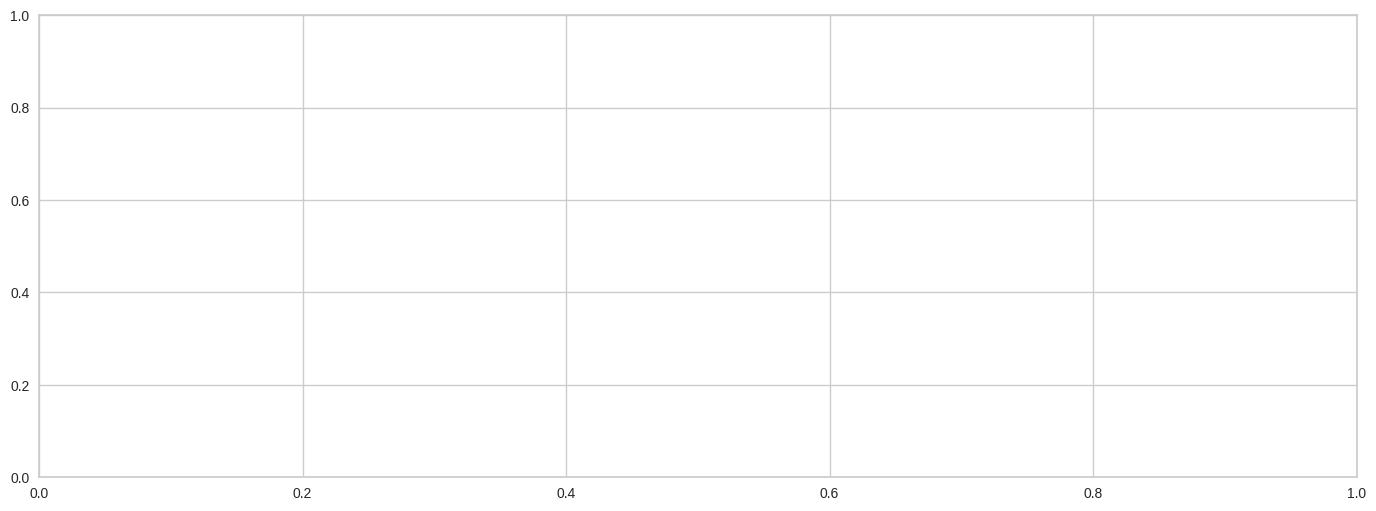

In [24]:
evaluate_model(tuned_ridge)

**Create Linear Discriminant Analysis**

In [25]:
lda = create_model('lda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [26]:
tuned_lda = tune_model(lda, n_iter=50)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 36 candidates, totalling 360 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Original model was better than the tuned model.

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

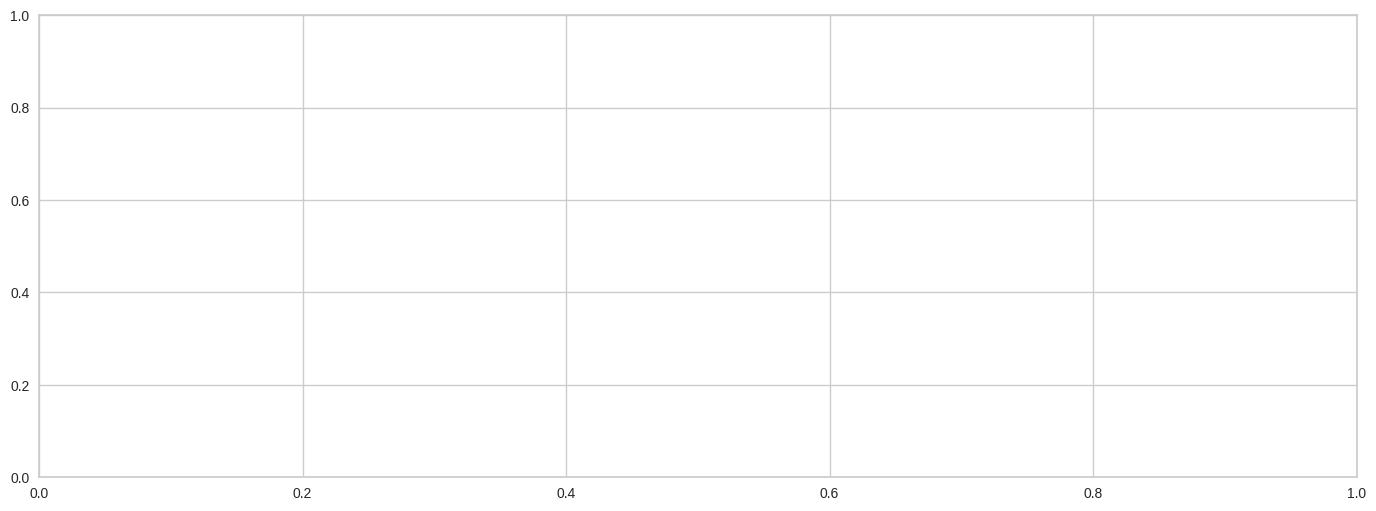

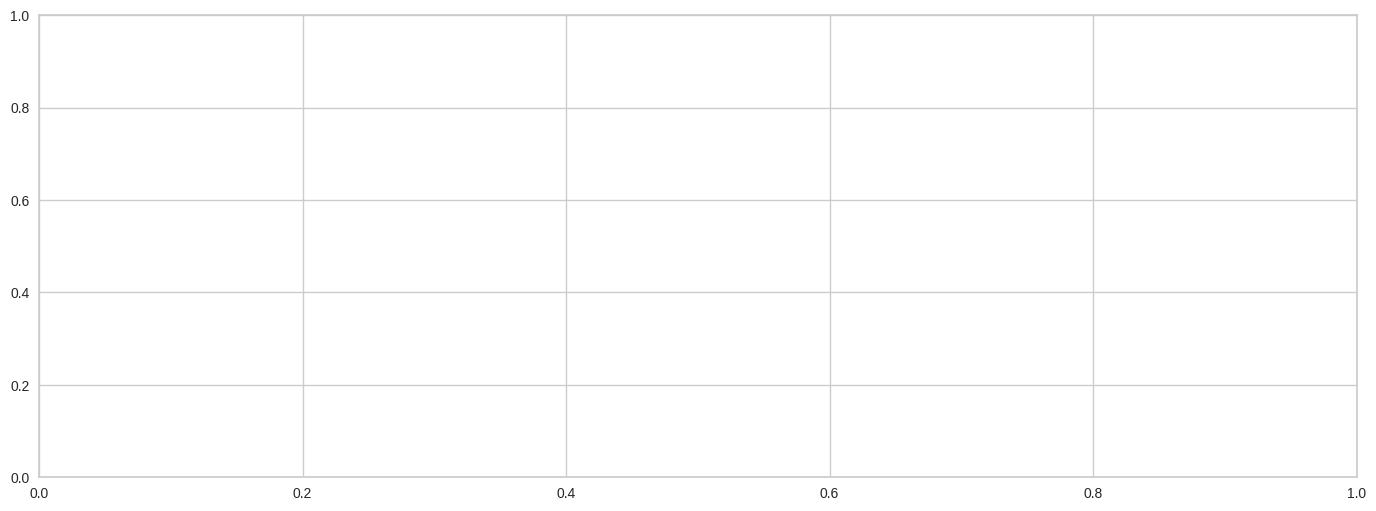

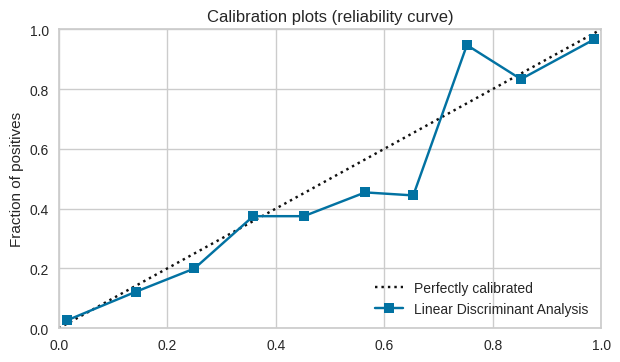

In [27]:
evaluate_model(tuned_lda)

**Create Logistic Regression Model**

In [28]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Logistic Regression Model**

In [29]:
tuned_lr = tune_model(lr, n_iter=50)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


After tuning, model's accuracy improved from 93.08% to 93.21%




**Evaluate Logistic Regression Model**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

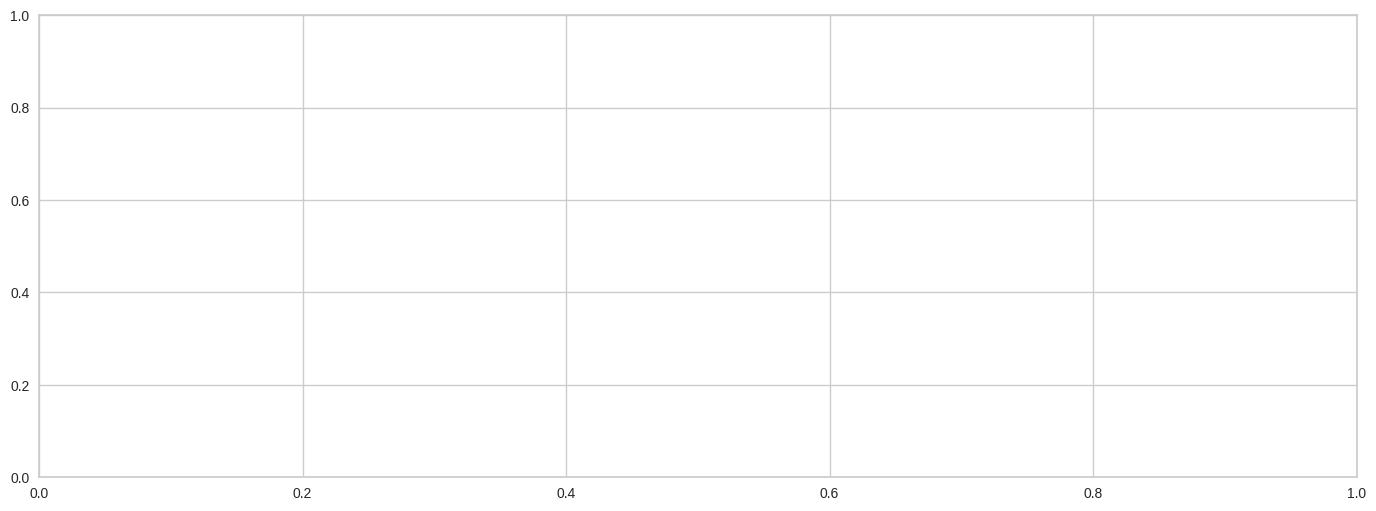

In [30]:
evaluate_model(tuned_lr)

#**Tune the Best Model**

In [66]:
# Tune hyperparameters with scikit-learn(default)
tuned_best_model = tune_model(best_model, n_iter=50)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [67]:
tuned_best_model

RidgeClassifier(alpha=0.2, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

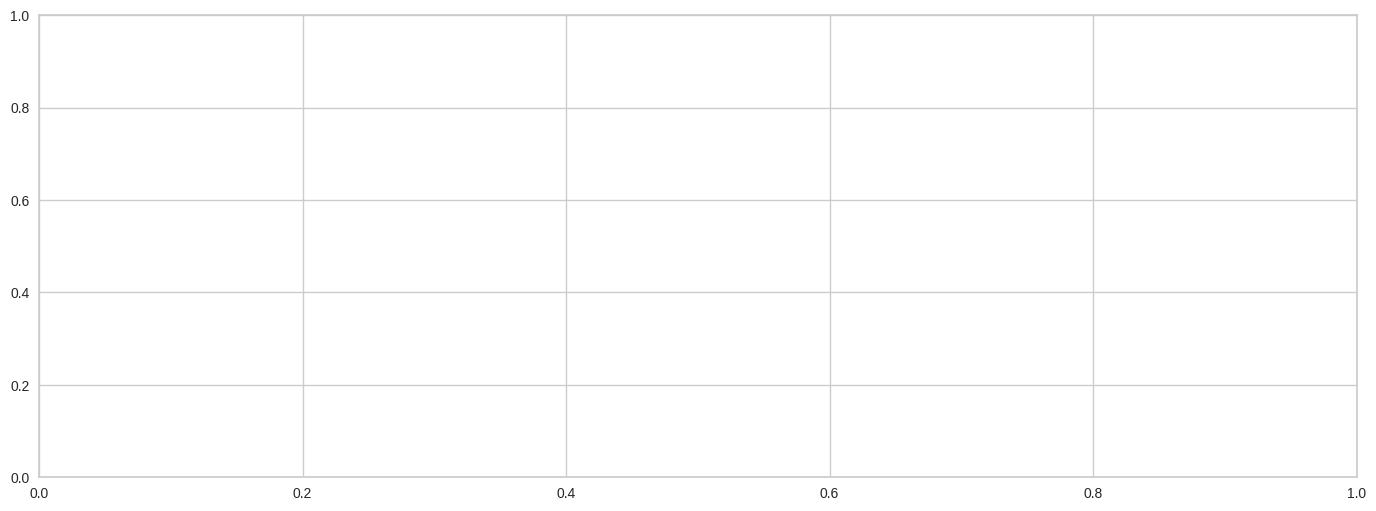

In [68]:
evaluate_model(tuned_best_model)

#**Classification + PCA**

In [69]:
clf_pca = setup(data=data, target='Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [70]:
best_model_pca1, best_model_pca2, best_model_pca3 = compare_models(n_select=3)

Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [71]:
best_model_pca1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune the Best Model1**

In [72]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca1 = tune_model(best_model_pca1)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [73]:
tuned_best_model_pca1

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model1**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

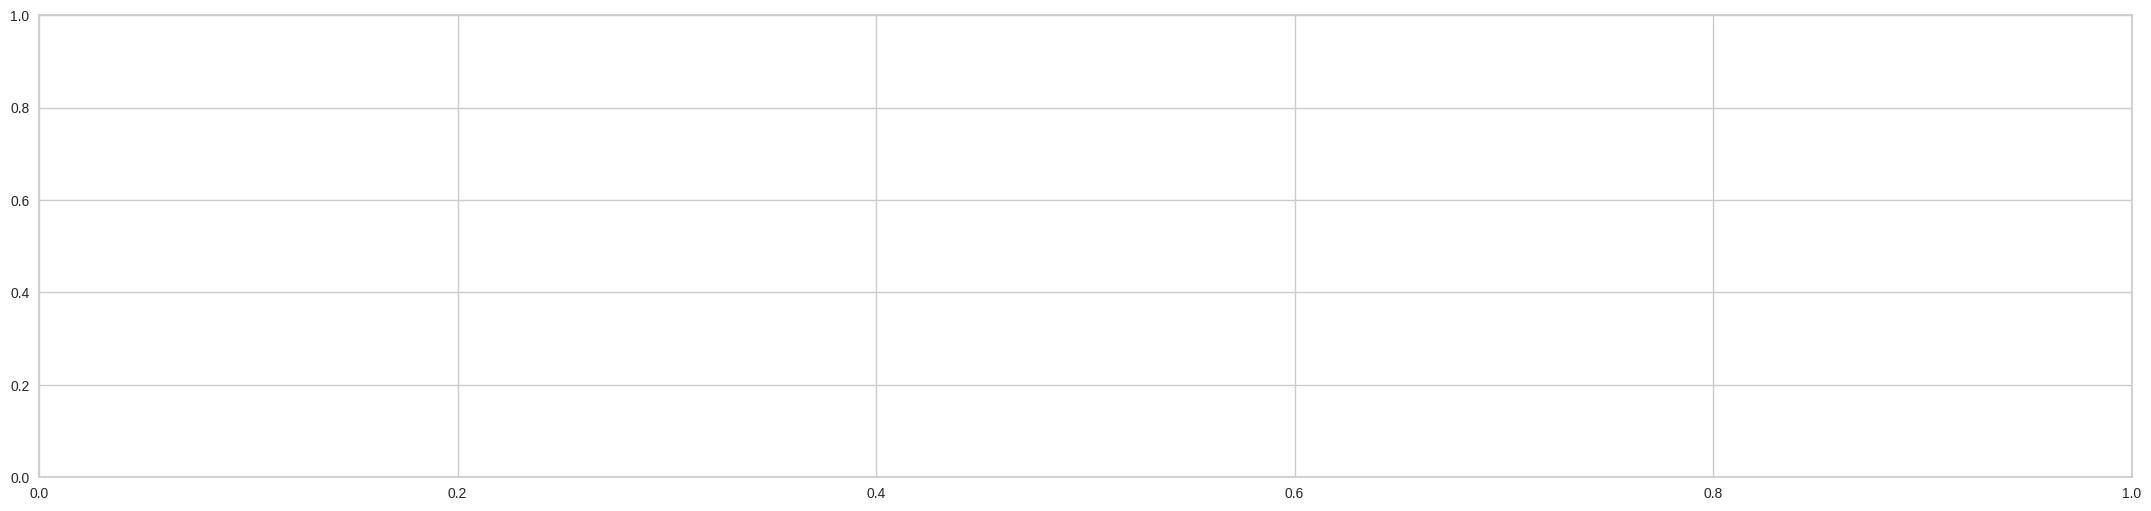

In [74]:
evaluate_model(tuned_best_model_pca1)

**Tune the Best Model2**

In [75]:
tuned_best_model_pca2 = tune_model(best_model_pca2)# search_library='scikit-optimize')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Best Model2**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

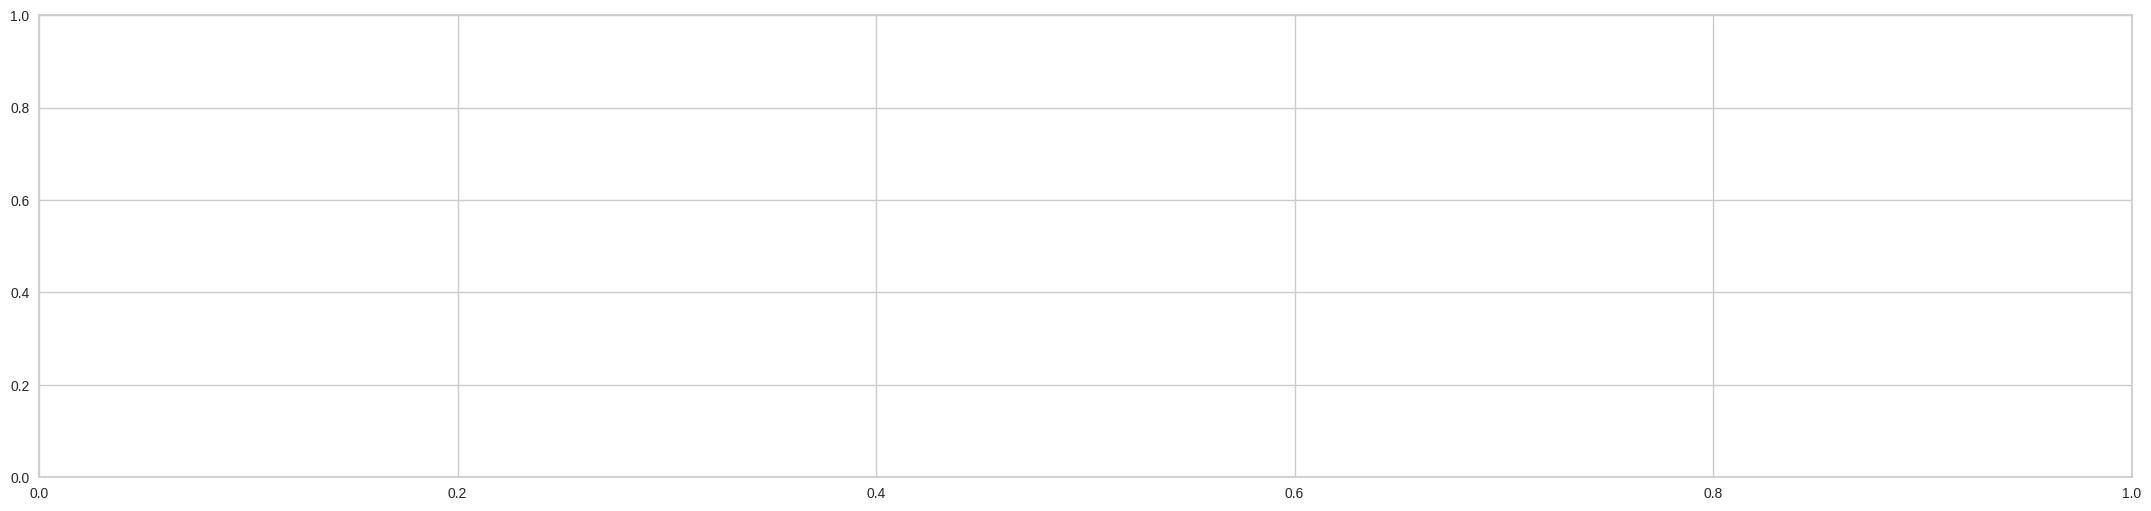

In [76]:
evaluate_model(tuned_best_model_pca2)

**Tune the Best Model3**

In [77]:
tuned_best_model_pca3 = tune_model(best_model_pca3)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate the Best Model3**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

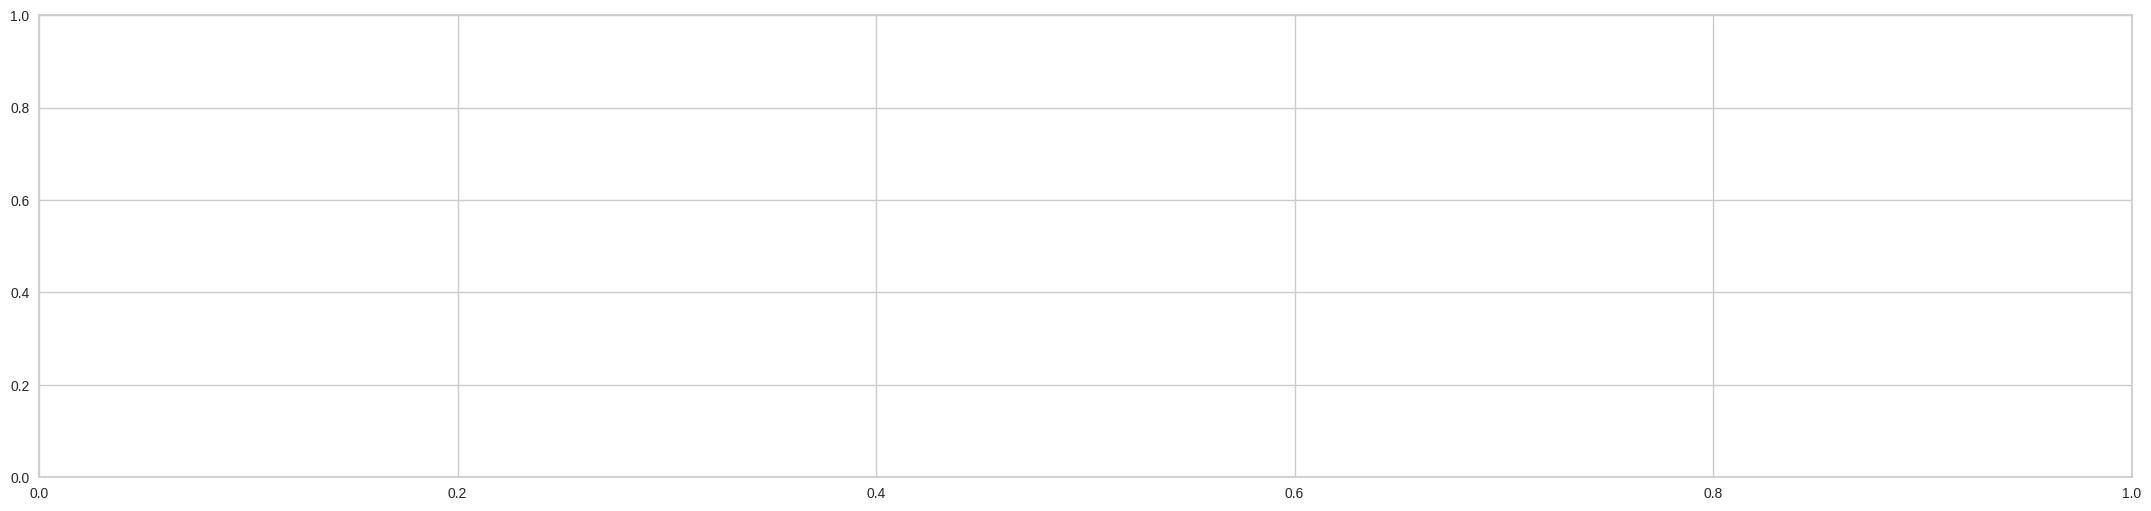

In [78]:
evaluate_model(tuned_best_model_pca3)


# **Deep Learning**

Deep learning is another machine learning method that is widely used to increase accuracy and predictability focuses on the development and training of artificial neural networks to perform tasks.

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

In [80]:
from sklearn.model_selection import train_test_split


In [81]:
df["Class2"] = df["Class"].apply(lambda x:0 if x=="Cammeo" else 1)
#df = df.apply(lambda x: np.square(x) if x.name == 'd' else x, axis=1)


In [82]:
y = df["Class2"]

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [85]:
from sklearn.metrics import classification_report,confusion_matrix

In [86]:
from sklearn.metrics import roc_curve, auc

In [ ]:
for first_layer in [2,4,8,16,32,64,128]:
    for second_layer in [2,4,8,16,32,64,128]:
        model = Sequential()

        model.add((Dense(first_layer,activation = 'relu')))
        model.add((Dense(second_layer,activation = 'relu')))

        model.add(Dense(1,activation = "sigmoid"))

        model.compile(optimizer = "rmsprop", loss = 'binary_crossentropy',metrics=["accuracy"])
        model.fit(x=x_train,y=y_train,epochs=1000,verbose=0)

        train_results = []
        test_results = []
        rf = model
        train_pred = (rf.predict(x_train)> 0.5).astype("int32")
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        train_results.append(roc_auc)
        y_pred = (rf.predict(x_test)> 0.5).astype("int32")
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        test_results.append(roc_auc)
        print("first_layer: ", first_layer)
        print("second_layer: ", second_layer)
        print(classification_report(y_test,y_pred))
        print("test_results AUC: ",test_results)
        print("train_results AUC: ",train_results)

36/36 [==============================] - 0s 2ms/step
first_layer:  2
second_layer:  2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       511
           1       0.55      1.00      0.71       632

    accuracy                           0.55      1143
   macro avg       0.28      0.50      0.36      1143
weighted avg       0.31      0.55      0.39      1143

test_results AUC:  [0.5]
train_results AUC:  [0.5]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 2ms/step
first_layer:  2
second_layer:  4
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       511
           1       0.95      0.90      0.92       632

    accuracy                           0.92      1143
   macro avg       0.92      0.92      0.92      1143
weighted avg       0.92      0.92      0.92      1143

test_results AUC:  [0.9198255468304887]
train_results AUC:  [0.9108786915227466]
36/36 [==============================] - 0s 2ms/step
first_layer:  2
second_layer:  8
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       511
           1       0.97      0.80      0.87       632

    accuracy                           0.87      1143
   macro avg       0.88      0.88      0.87      1143
weighted avg       0.89      0.87      0.87      1143

test_results AUC:  [0.8832659342564839]
train_results AUC:  [0.8657404520924692]
36/36 [=====

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 3ms/step
first_layer:  2
second_layer:  32
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       511
           1       0.93      0.93      0.93       632

    accuracy                           0.92      1143
   macro avg       0.92      0.92      0.92      1143
weighted avg       0.92      0.92      0.92      1143

test_results AUC:  [0.9193889494414029]
train_results AUC:  [0.9150447520280428]
36/36 [==============================] - 0s 2ms/step
first_layer:  2
second_layer:  64
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       511
           1       0.55      1.00      0.71       632

    accuracy                           0.55      1143
   macro avg       0.28      0.50      0.36      1143
weighted avg       0.31      0.55      0.39      1143

test_results AUC:  [0.5]
train_results AUC:  [0.5]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 2ms/step
first_layer:  2
second_layer:  128
              precision    recall  f1-score   support

           0       0.99      0.55      0.71       511
           1       0.73      0.99      0.84       632

    accuracy                           0.80      1143
   macro avg       0.86      0.77      0.77      1143
weighted avg       0.85      0.80      0.78      1143

test_results AUC:  [0.771786519358914]
train_results AUC:  [0.7795633559864497]
36/36 [==============================] - 0s 4ms/step
first_layer:  4
second_layer:  2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       511
           1       0.55      1.00      0.71       632

    accuracy                           0.55      1143
   macro avg       0.28      0.50      0.36      1143
weighted avg       0.31      0.55      0.39      1143

test_results AUC:  [0.5]
train_results AUC:  [0.5]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 2ms/step
first_layer:  4
second_layer:  4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       511
           1       0.55      1.00      0.71       632

    accuracy                           0.55      1143
   macro avg       0.28      0.50      0.36      1143
weighted avg       0.31      0.55      0.39      1143

test_results AUC:  [0.5]
train_results AUC:  [0.5]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 3ms/step
first_layer:  4
second_layer:  8
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       511
           1       0.96      0.87      0.91       632

    accuracy                           0.91      1143
   macro avg       0.91      0.91      0.91      1143
weighted avg       0.91      0.91      0.91      1143

test_results AUC:  [0.9134128291510812]
train_results AUC:  [0.8945461063657336]
36/36 [==============================] - 0s 2ms/step
first_layer:  4
second_layer:  16
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       511
           1       0.55      1.00      0.71       632

    accuracy                           0.55      1143
   macro avg       0.28      0.50      0.36      1143
weighted avg       0.31      0.55      0.39      1143

test_results AUC:  [0.5]
train_results AUC:  [0.5]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 2ms/step
first_layer:  4
second_layer:  32
              precision    recall  f1-score   support

           0       0.98      0.67      0.80       511
           1       0.79      0.99      0.88       632

    accuracy                           0.85      1143
   macro avg       0.88      0.83      0.84      1143
weighted avg       0.87      0.85      0.84      1143

test_results AUC:  [0.8290999900914069]
train_results AUC:  [0.8404288851480072]
36/36 [==============================] - 0s 2ms/step
first_layer:  4
second_layer:  64
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       511
           1       0.96      0.90      0.93       632

    accuracy                           0.92      1143
   macro avg       0.92      0.93      0.92      1143
weighted avg       0.93      0.92      0.92      1143

test_results AUC:  [0.926487527558275]
train_results AUC:  [0.9149971250632141]
36/36 [====

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 2ms/step
first_layer:  8
second_layer:  2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       511
           1       0.55      1.00      0.71       632

    accuracy                           0.55      1143
   macro avg       0.28      0.50      0.36      1143
weighted avg       0.31      0.55      0.39      1143

test_results AUC:  [0.5]
train_results AUC:  [0.5]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 2ms/step
first_layer:  8
second_layer:  4
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       511
           1       0.92      0.95      0.94       632

    accuracy                           0.93      1143
   macro avg       0.93      0.93      0.93      1143
weighted avg       0.93      0.93      0.93      1143

test_results AUC:  [0.925572530902425]
train_results AUC:  [0.920244750642531]
36/36 [==============================] - 0s 2ms/step
first_layer:  8
second_layer:  8
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       511
           1       0.55      1.00      0.71       632

    accuracy                           0.55      1143
   macro avg       0.28      0.50      0.36      1143
weighted avg       0.31      0.55      0.39      1143

test_results AUC:  [0.5]
train_results AUC:  [0.5]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 2ms/step
first_layer:  8
second_layer:  16
              precision    recall  f1-score   support

           0       0.97      0.73      0.84       511
           1       0.82      0.98      0.89       632

    accuracy                           0.87      1143
   macro avg       0.90      0.86      0.87      1143
weighted avg       0.89      0.87      0.87      1143

test_results AUC:  [0.8580377269687136]
train_results AUC:  [0.87172846048867]
36/36 [==============================] - 0s 2ms/step
first_layer:  8
second_layer:  32
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       511
           1       0.97      0.84      0.90       632

    accuracy                           0.90      1143
   macro avg       0.90      0.91      0.90      1143
weighted avg       0.91      0.90      0.90      1143

test_results AUC:  [0.9063963065718745]
train_results AUC:  [0.8814703396581942]
36/36 [=====

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 2ms/step
first_layer:  16
second_layer:  4
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       511
           1       0.89      0.97      0.93       632

    accuracy                           0.92      1143
   macro avg       0.93      0.91      0.92      1143
weighted avg       0.92      0.92      0.92      1143

test_results AUC:  [0.9123739750798879]
train_results AUC:  [0.911587900326288]
36/36 [==============================] - 0s 2ms/step
first_layer:  16
second_layer:  8
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       511
           1       0.55      1.00      0.71       632

    accuracy                           0.55      1143
   macro avg       0.28      0.50      0.36      1143
weighted avg       0.31      0.55      0.39      1143

test_results AUC:  [0.5]
train_results AUC:  [0.5]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 2ms/step
first_layer:  16
second_layer:  16
              precision    recall  f1-score   support

           0       0.78      0.97      0.87       511
           1       0.97      0.78      0.87       632

    accuracy                           0.87      1143
   macro avg       0.88      0.88      0.87      1143
weighted avg       0.89      0.87      0.87      1143

test_results AUC:  [0.876520349773341]
train_results AUC:  [0.8584838345421923]
36/36 [==============================] - 0s 2ms/step
first_layer:  16
second_layer:  32
              precision    recall  f1-score   support

           0       0.98      0.73      0.84       511
           1       0.82      0.99      0.89       632

    accuracy                           0.87      1143
   macro avg       0.90      0.86      0.86      1143
weighted avg       0.89      0.87      0.87      1143

test_results AUC:  [0.8578503926280067]
train_results AUC:  [0.8698441645710804]
36/36 [==

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 2ms/step
first_layer:  32
second_layer:  2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       511
           1       0.55      1.00      0.71       632

    accuracy                           0.55      1143
   macro avg       0.28      0.50      0.36      1143
weighted avg       0.31      0.55      0.39      1143

test_results AUC:  [0.5]
train_results AUC:  [0.5]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 2ms/step
first_layer:  32
second_layer:  4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       511
           1       0.55      1.00      0.71       632

    accuracy                           0.55      1143
   macro avg       0.28      0.50      0.36      1143
weighted avg       0.31      0.55      0.39      1143

test_results AUC:  [0.5]
train_results AUC:  [0.5]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 2ms/step
first_layer:  32
second_layer:  8
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       511
           1       0.97      0.81      0.89       632

    accuracy                           0.88      1143
   macro avg       0.89      0.89      0.88      1143
weighted avg       0.90      0.88      0.88      1143

test_results AUC:  [0.8927596051425599]
train_results AUC:  [0.874762731120671]
36/36 [==============================] - 0s 2ms/step
first_layer:  32
second_layer:  16
              precision    recall  f1-score   support

           0       0.98      0.67      0.79       511
           1       0.78      0.99      0.87       632

    accuracy                           0.84      1143
   macro avg       0.88      0.83      0.83      1143
weighted avg       0.87      0.84      0.84      1143

test_results AUC:  [0.8263519036884738]
train_results AUC:  [0.8358367797936974]
36/36 [===

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 2ms/step
first_layer:  64
second_layer:  4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       511
           1       0.55      1.00      0.71       632

    accuracy                           0.55      1143
   macro avg       0.28      0.50      0.36      1143
weighted avg       0.31      0.55      0.39      1143

test_results AUC:  [0.5]
train_results AUC:  [0.5]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 2ms/step
first_layer:  64
second_layer:  8
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       511
           1       0.55      1.00      0.71       632

    accuracy                           0.55      1143
   macro avg       0.28      0.50      0.36      1143
weighted avg       0.31      0.55      0.39      1143

test_results AUC:  [0.5]
train_results AUC:  [0.5]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 2ms/step
first_layer:  64
second_layer:  16
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       511
           1       0.55      1.00      0.71       632

    accuracy                           0.55      1143
   macro avg       0.28      0.50      0.36      1143
weighted avg       0.31      0.55      0.39      1143

test_results AUC:  [0.5]
train_results AUC:  [0.5]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 2ms/step
first_layer:  64
second_layer:  32
              precision    recall  f1-score   support

           0       0.98      0.69      0.81       511
           1       0.80      0.99      0.88       632

    accuracy                           0.86      1143
   macro avg       0.89      0.84      0.85      1143
weighted avg       0.88      0.86      0.85      1143

test_results AUC:  [0.8400505338254602]
train_results AUC:  [0.8546035358258689]
36/36 [==============================] - 0s 2ms/step
first_layer:  64
second_layer:  64
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       511
           1       0.93      0.95      0.94       632

    accuracy                           0.93      1143
   macro avg       0.93      0.93      0.93      1143
weighted avg       0.93      0.93      0.93      1143

test_results AUC:  [0.9310269018306125]
train_results AUC:  [0.9211332100227917]
36/36 [=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 2ms/step
first_layer:  128
second_layer:  4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       511
           1       0.55      1.00      0.71       632

    accuracy                           0.55      1143
   macro avg       0.28      0.50      0.36      1143
weighted avg       0.31      0.55      0.39      1143

test_results AUC:  [0.5]
train_results AUC:  [0.5]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 2ms/step
first_layer:  128
second_layer:  8
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       511
           1       0.55      1.00      0.71       632

    accuracy                           0.55      1143
   macro avg       0.28      0.50      0.36      1143
weighted avg       0.31      0.55      0.39      1143

test_results AUC:  [0.5]
train_results AUC:  [0.5]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 2ms/step
first_layer:  128
second_layer:  16
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       511
           1       0.55      1.00      0.71       632

    accuracy                           0.55      1143
   macro avg       0.28      0.50      0.36      1143
weighted avg       0.31      0.55      0.39      1143

test_results AUC:  [0.5]
train_results AUC:  [0.5]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 2ms/step
first_layer:  128
second_layer:  32
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       511
           1       0.96      0.90      0.93       632

    accuracy                           0.92      1143
   macro avg       0.92      0.93      0.92      1143
weighted avg       0.93      0.92      0.92      1143

test_results AUC:  [0.926487527558275]
train_results AUC:  [0.9123646528254048]
36/36 [==============================] - 0s 3ms/step
first_layer:  128
second_layer:  64
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       511
           1       0.94      0.94      0.94       632

    accuracy                           0.93      1143
   macro avg       0.93      0.93      0.93      1143
weighted avg       0.93      0.93      0.93      1143

test_results AUC:  [0.9317762391934404]
train_results AUC:  [0.9213003373720998]
36/36 [

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The best model is when:

first_layer:  128

second_layer:  64

                    precision    recall  f1-score   support

               0       0.93      0.92      0.92       511
               1       0.94      0.94      0.94       632

        accuracy                           0.93      1143
       macro avg       0.93      0.93      0.93      1143
    weighted avg       0.93      0.93      0.93      1143


test_results AUC:  0.9317762391934404

train_results AUC:  0.9213003373720998